In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [3]:
def addlabels(x,y, z):
    for i in range(len(x)):
        label = "{:.2f}".format(y[i])
        plt.annotate(label, (x[i],z[i]+y[i]+3), ha = 'center')

def plot(file, n, output_path):
    plt.figure(figsize=(10, 8.5), dpi=200)
    values_less = list([i*100 for i in file.iloc[:6, 2]])
    errorless_low = list([i*100 for i in file.iloc[:6, n[0]]])
    errorless_up = list([i*100 for i in file.iloc[:6, n[1]]])
    values_large = list([i*100 for i in file.iloc[7:-1,2]])
    errorlarge_low = list([i*100 for i in file.iloc[7:-1, n[0]]])
    errorlarge_up = list([i*100 for i in file.iloc[7:-1, n[1]]])
    
    keys_less = np.arange(len(values_less))
    keys_large = [x + 0.4 for x in keys_less]

    errorsless = [errorless_low, errorless_up]
    errorlarge = [errorlarge_low, errorlarge_up]
    
    plt.bar(keys_less, values_less, width=0.4, edgecolor = 'black', color='lightsteelblue', capsize=7, label=file.iloc[0,0])
    plt.errorbar(keys_less, values_less, yerr=errorsless, fmt="none", color="black", capsize=4)
    plt.bar(keys_large, values_large, width=0.4, edgecolor = 'black', color='slategrey', capsize=7, label=file.iloc[6,0])
    plt.errorbar(keys_large, values_large, yerr=errorlarge, fmt="none", color="black", capsize=4)
#     display(plt.bar(keys, values, edgecolor = 'black', yerr=error, capsize=7, color='darkorange'))
    
    axes = plt.gca()
#     axes.set_xlim([x_min,x_max])
    axes.set_ylim([0,105])
    axes.set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]) 
    addlabels(keys_less, values_less, errorsless[1])
    addlabels(keys_large, values_large, errorlarge[1])
    # axes.text(n + .25, v + 3, str(v), color='blue', fontweight='bold')
    # plt.title('Average percentage of CONSORT methodology items reported in RCT publications per time period')
    plt.title('Average percentage of CONSORT methodology items reported in RCT publications by journal impact factors')
    # plt.title('Average percentage of CONSORT methodology items reported in RCT publications by their medical discipline')
    plt.xticks([r + 0.2 for r in range(len(keys_less))], file.iloc[:7,1], ha="center")
    plt.xlabel('Time period')
    plt.ylabel("Percentage")
    plt.tick_params(axis='x', color='orange', length=3, labelrotation=25)
    plt.legend()
    # plt.setp( axes.xaxis.get_majorticklabels(), rotation=45 )
    plt.savefig(output_path + file.iloc[0,0] + ".png", bbox_inches='tight')
    
    plt.show()

In [4]:
impactfactor = pd.read_excel('UTRECHT_addition_analysis.xlsx', 'if bootstrap') 

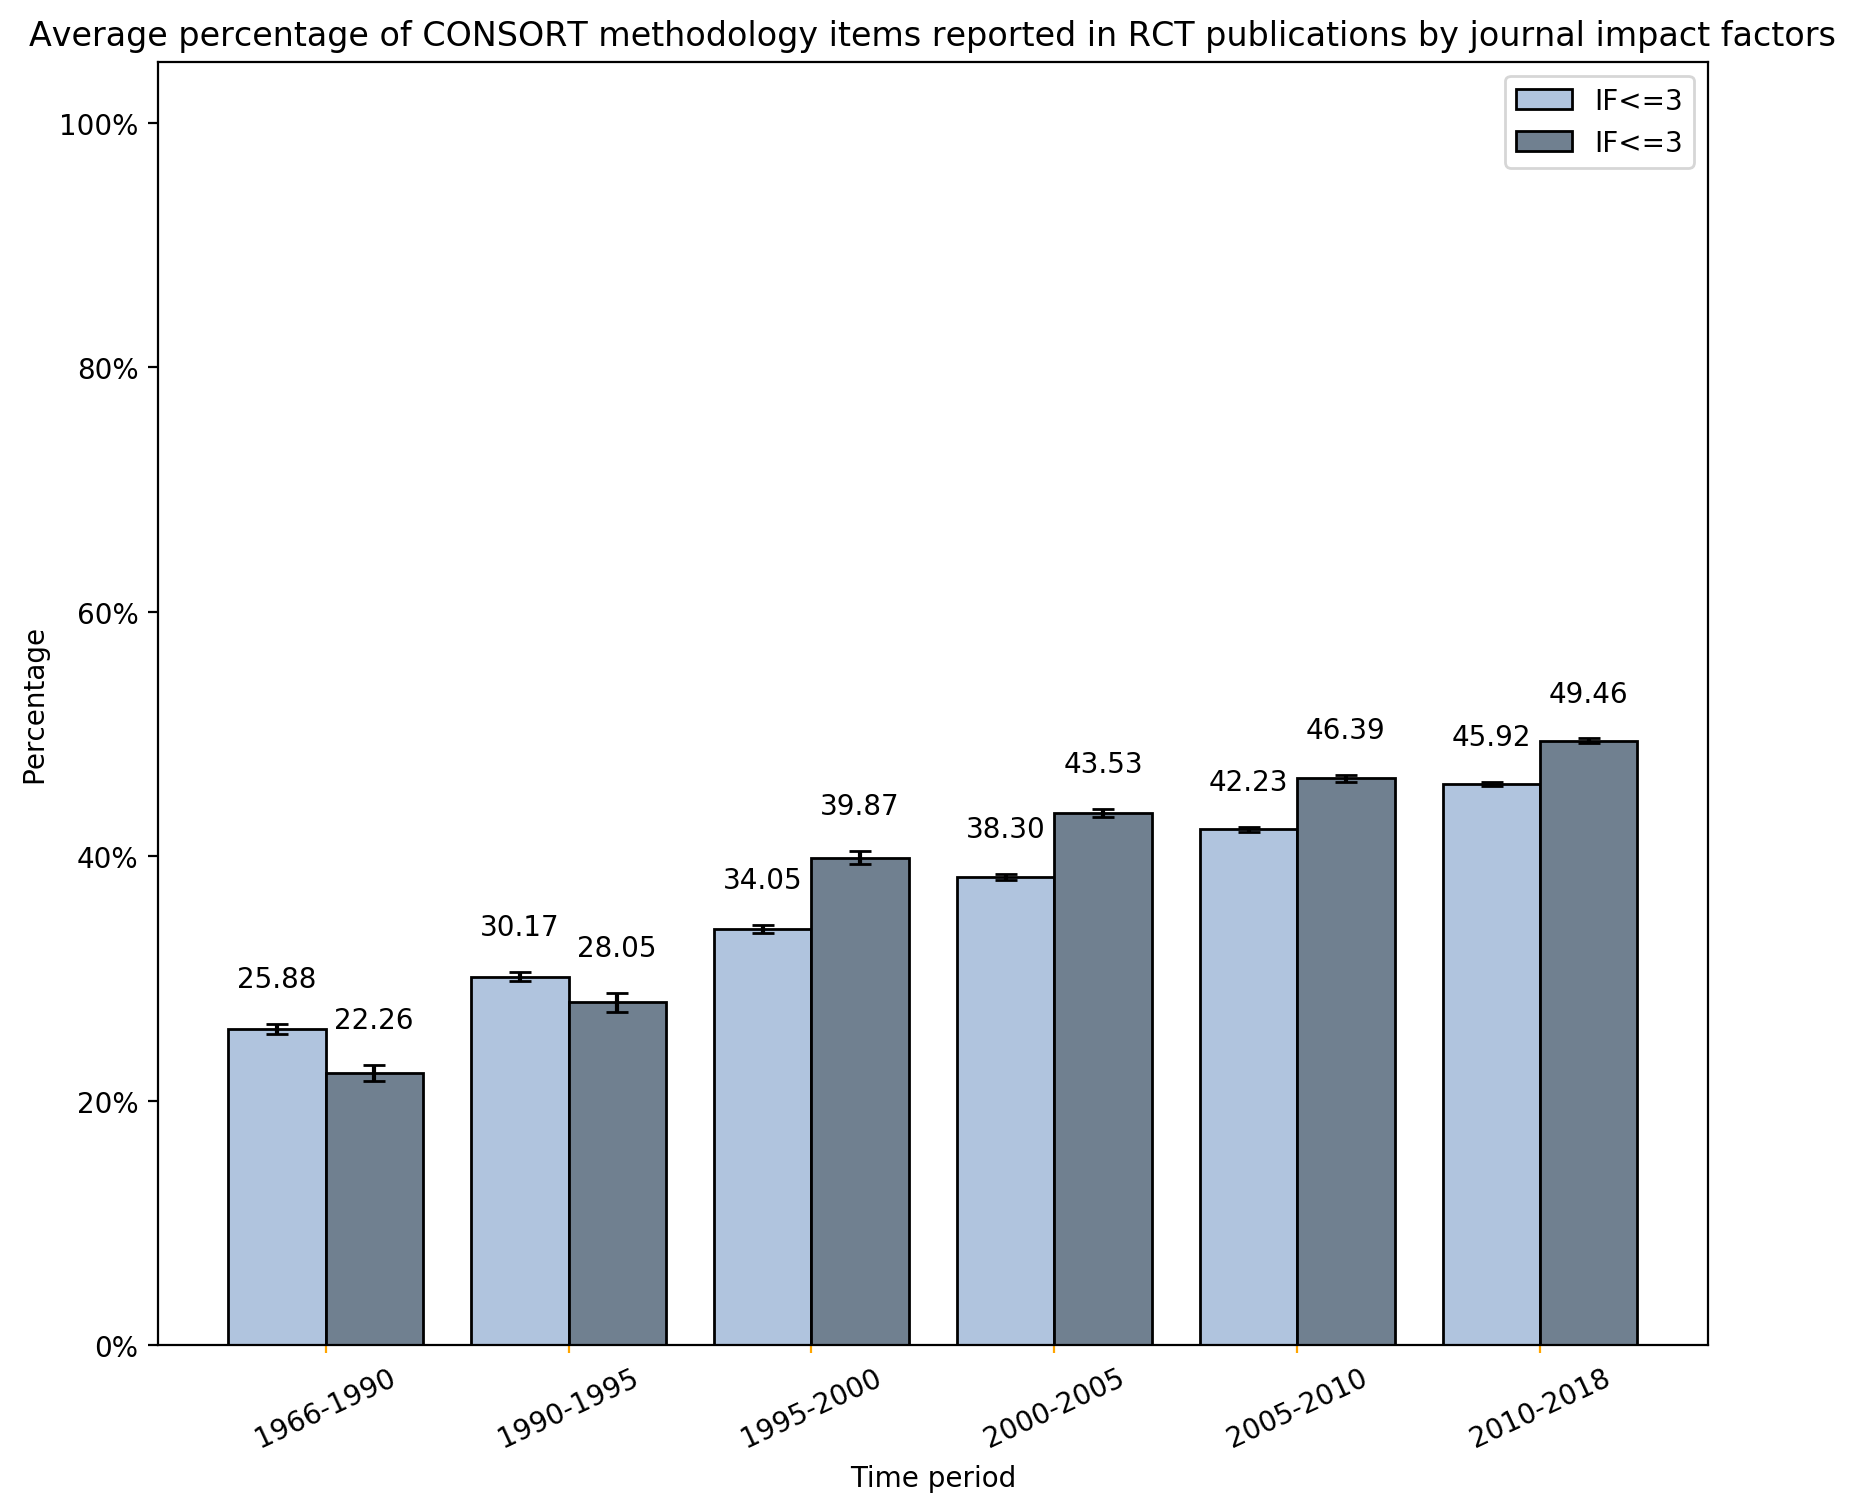

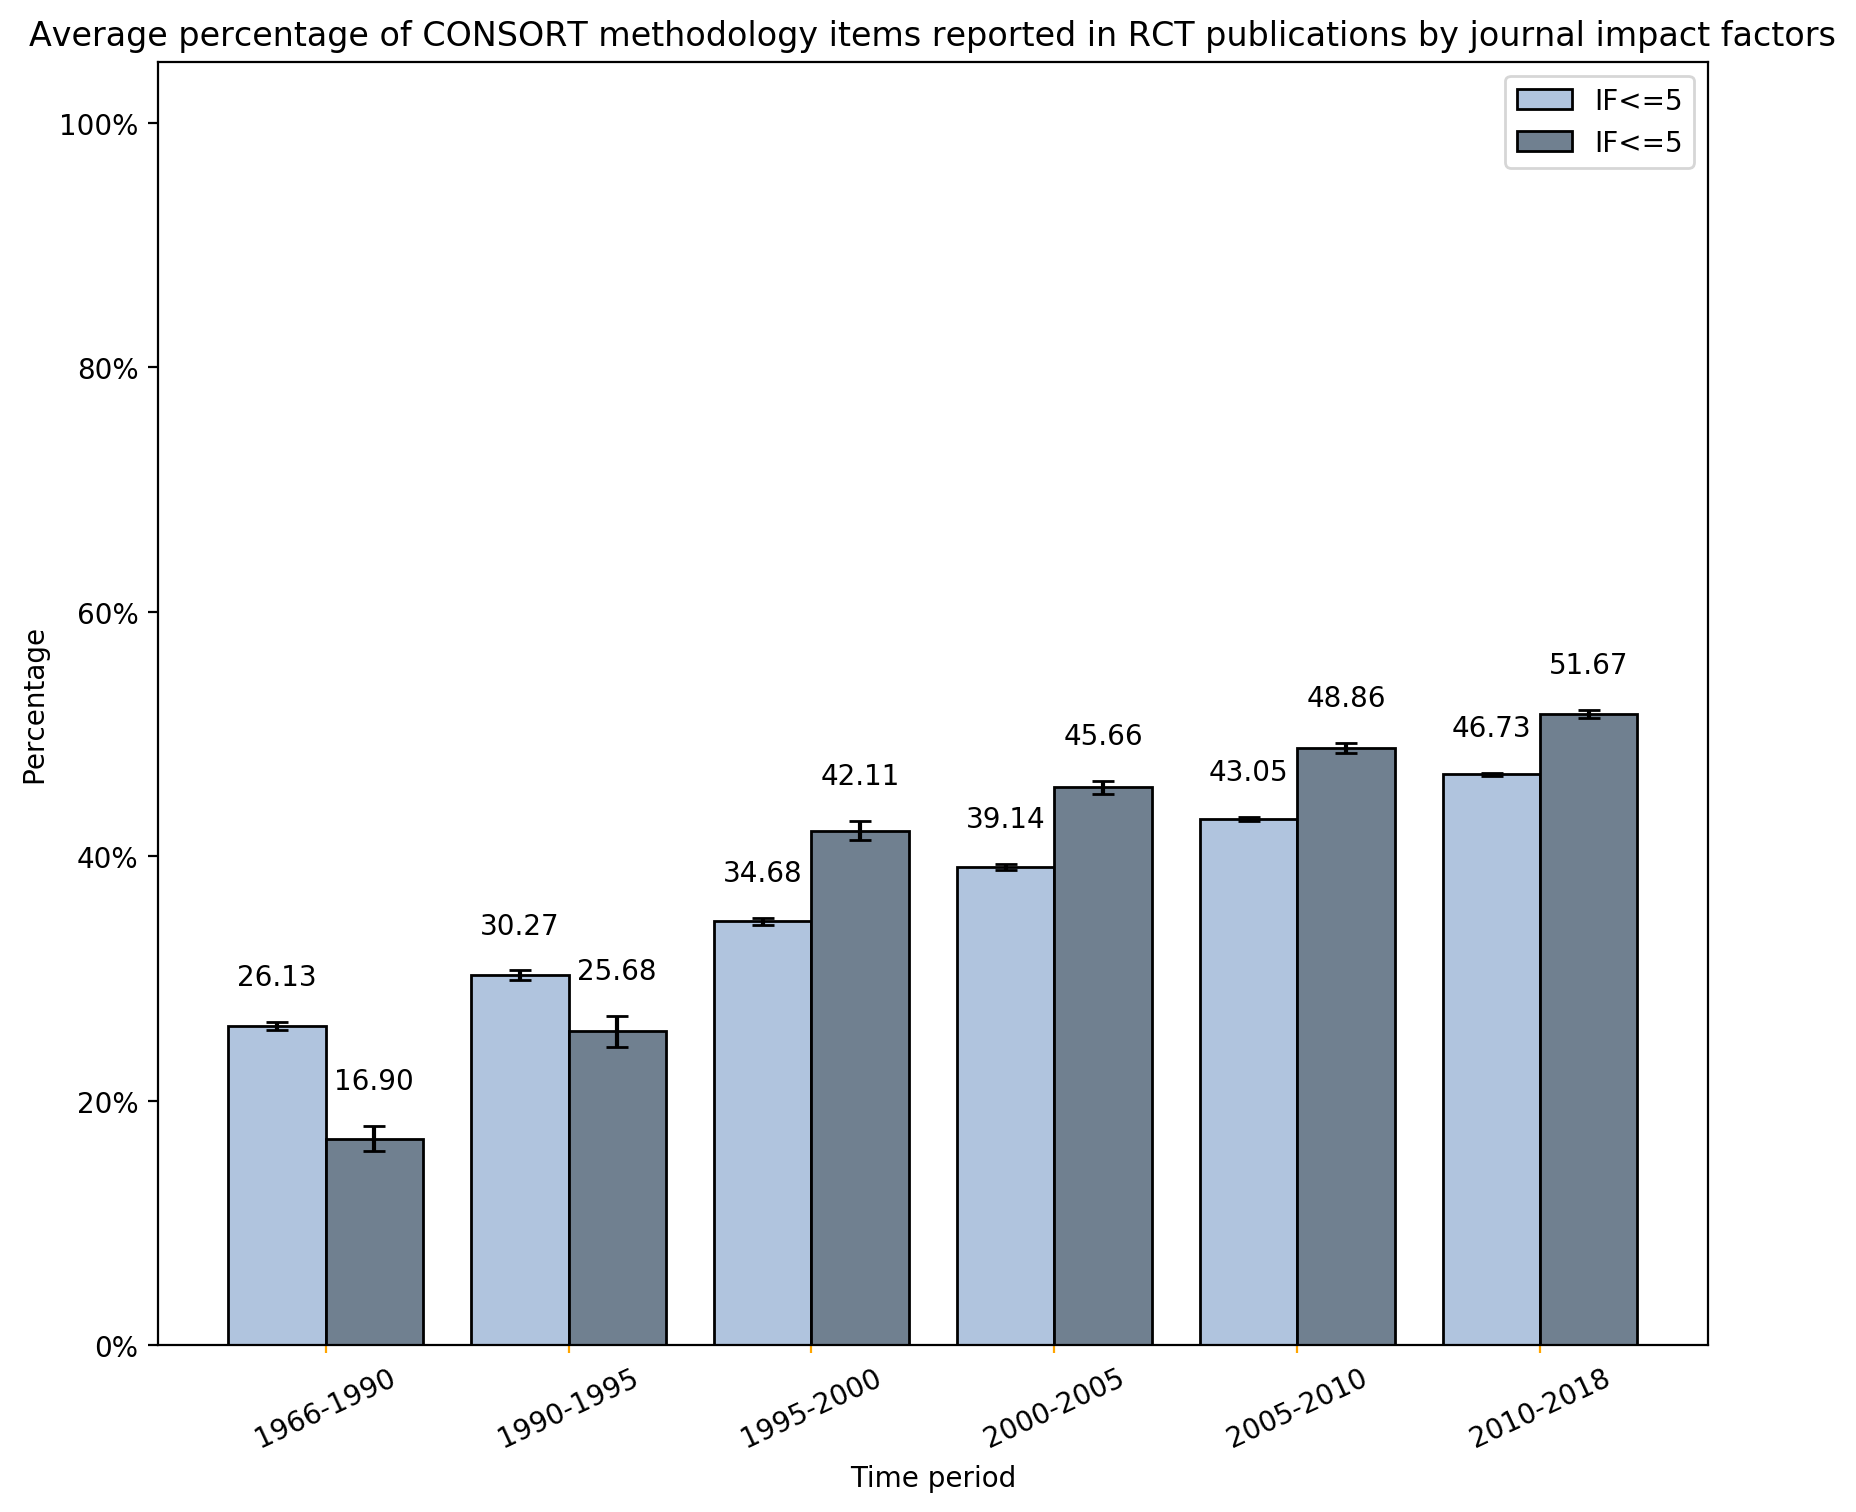

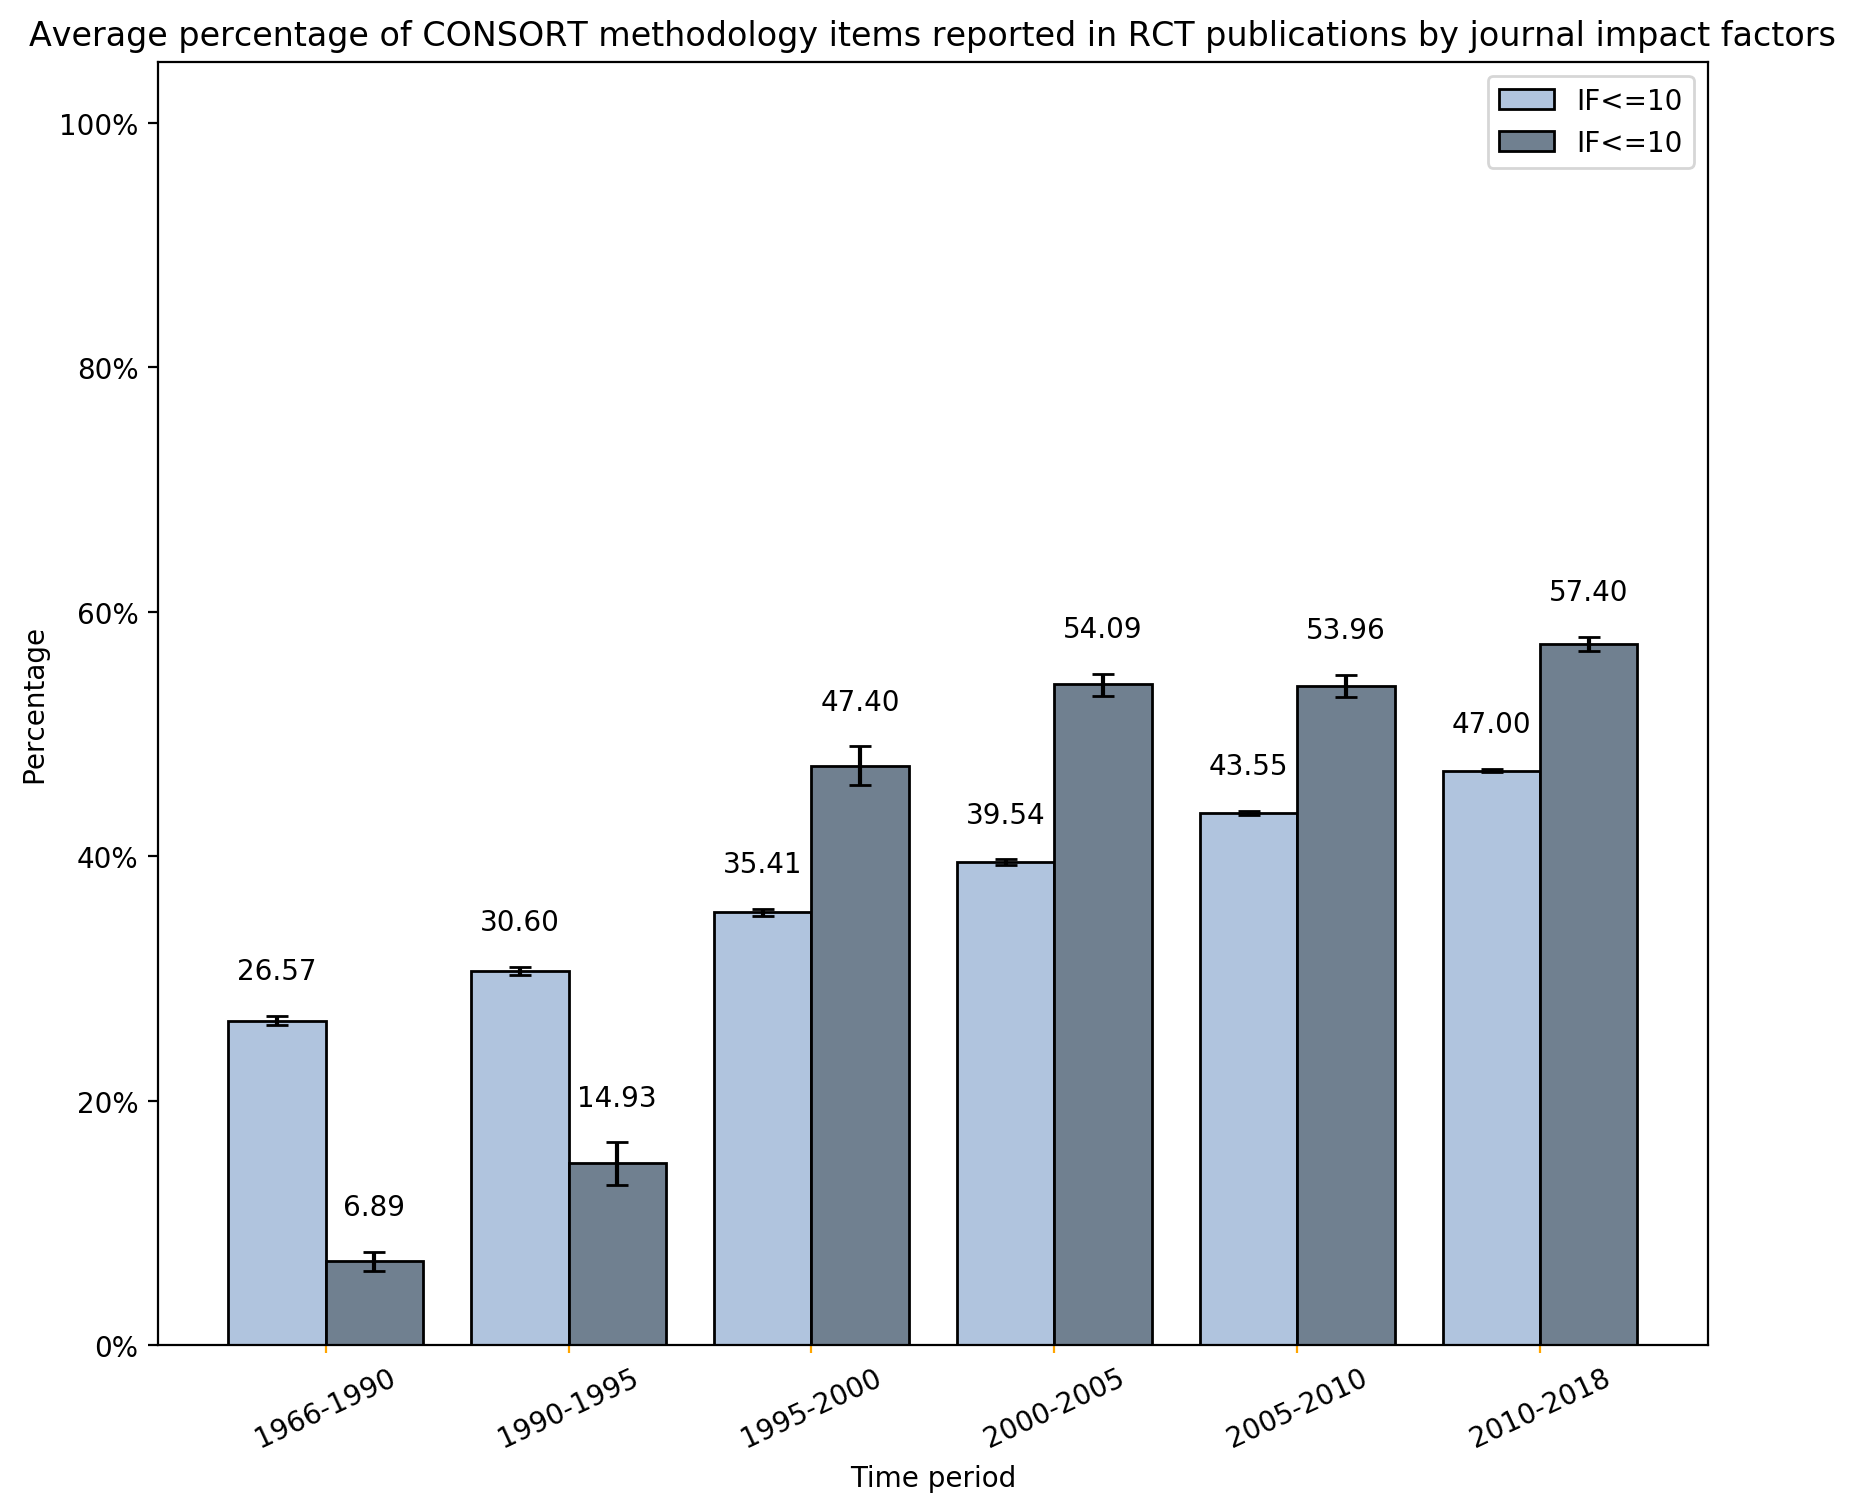

In [5]:
for i in range(0, 42, 14):
    plot(impactfactor.iloc[i:i+14], [5, 6], 'Figures/')

In [53]:
year = pd.read_excel('UTRECHT_addition_analysis.xlsx', 'year bootstrap') 

In [71]:
def addlabels(x,y, z):
    for i in range(len(x)):
        plt.text(i,z[i]+y[i]+3,round(y[i], 2), ha = 'center')

def plot(file, n, output_path):
    plt.figure(figsize=(10, 8.5), dpi=200)
    keys = list(file.iloc[:, 0])
    values = list([i*100 for i in file.iloc[:, 1]])
    error_low = list([i*100 for i in file.iloc[:, n[0]]])
    error_up = list([i*100 for i in file.iloc[:, n[1]]])
    errors = [error_low, error_up]
    display(plt.bar(keys, values, edgecolor = 'black', color='green', capsize=7))
    plt.errorbar(keys, values, yerr=errors, fmt="none", color="black", capsize=5)
#     display(plt.bar(keys, values, edgecolor = 'black', yerr=error, capsize=7, color='darkorange'))
    
    axes = plt.gca()
#     axes.set_xlim([x_min,x_max])
    axes.set_ylim([0,105])
    axes.set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]) 
    addlabels(keys, values, errors[1])
    # axes.text(n + .25, v + 3, str(v), color='blue', fontweight='bold')
    plt.title('Average percentage of CONSORT methodology items reported in RCT publications per time period')
    plt.xticks(keys, keys, ha="center")
    plt.xlabel(file.columns[0])
    plt.ylabel("Percentage")
    plt.tick_params(axis='x', color='orange', length=3, labelrotation=25)
    # plt.setp( axes.xaxis.get_majorticklabels(), rotation=45 )
    plt.savefig(output_path + file.iloc[0,0] + ".png", bbox_inches='tight')
    
    plt.show()

<BarContainer object of 6 artists>

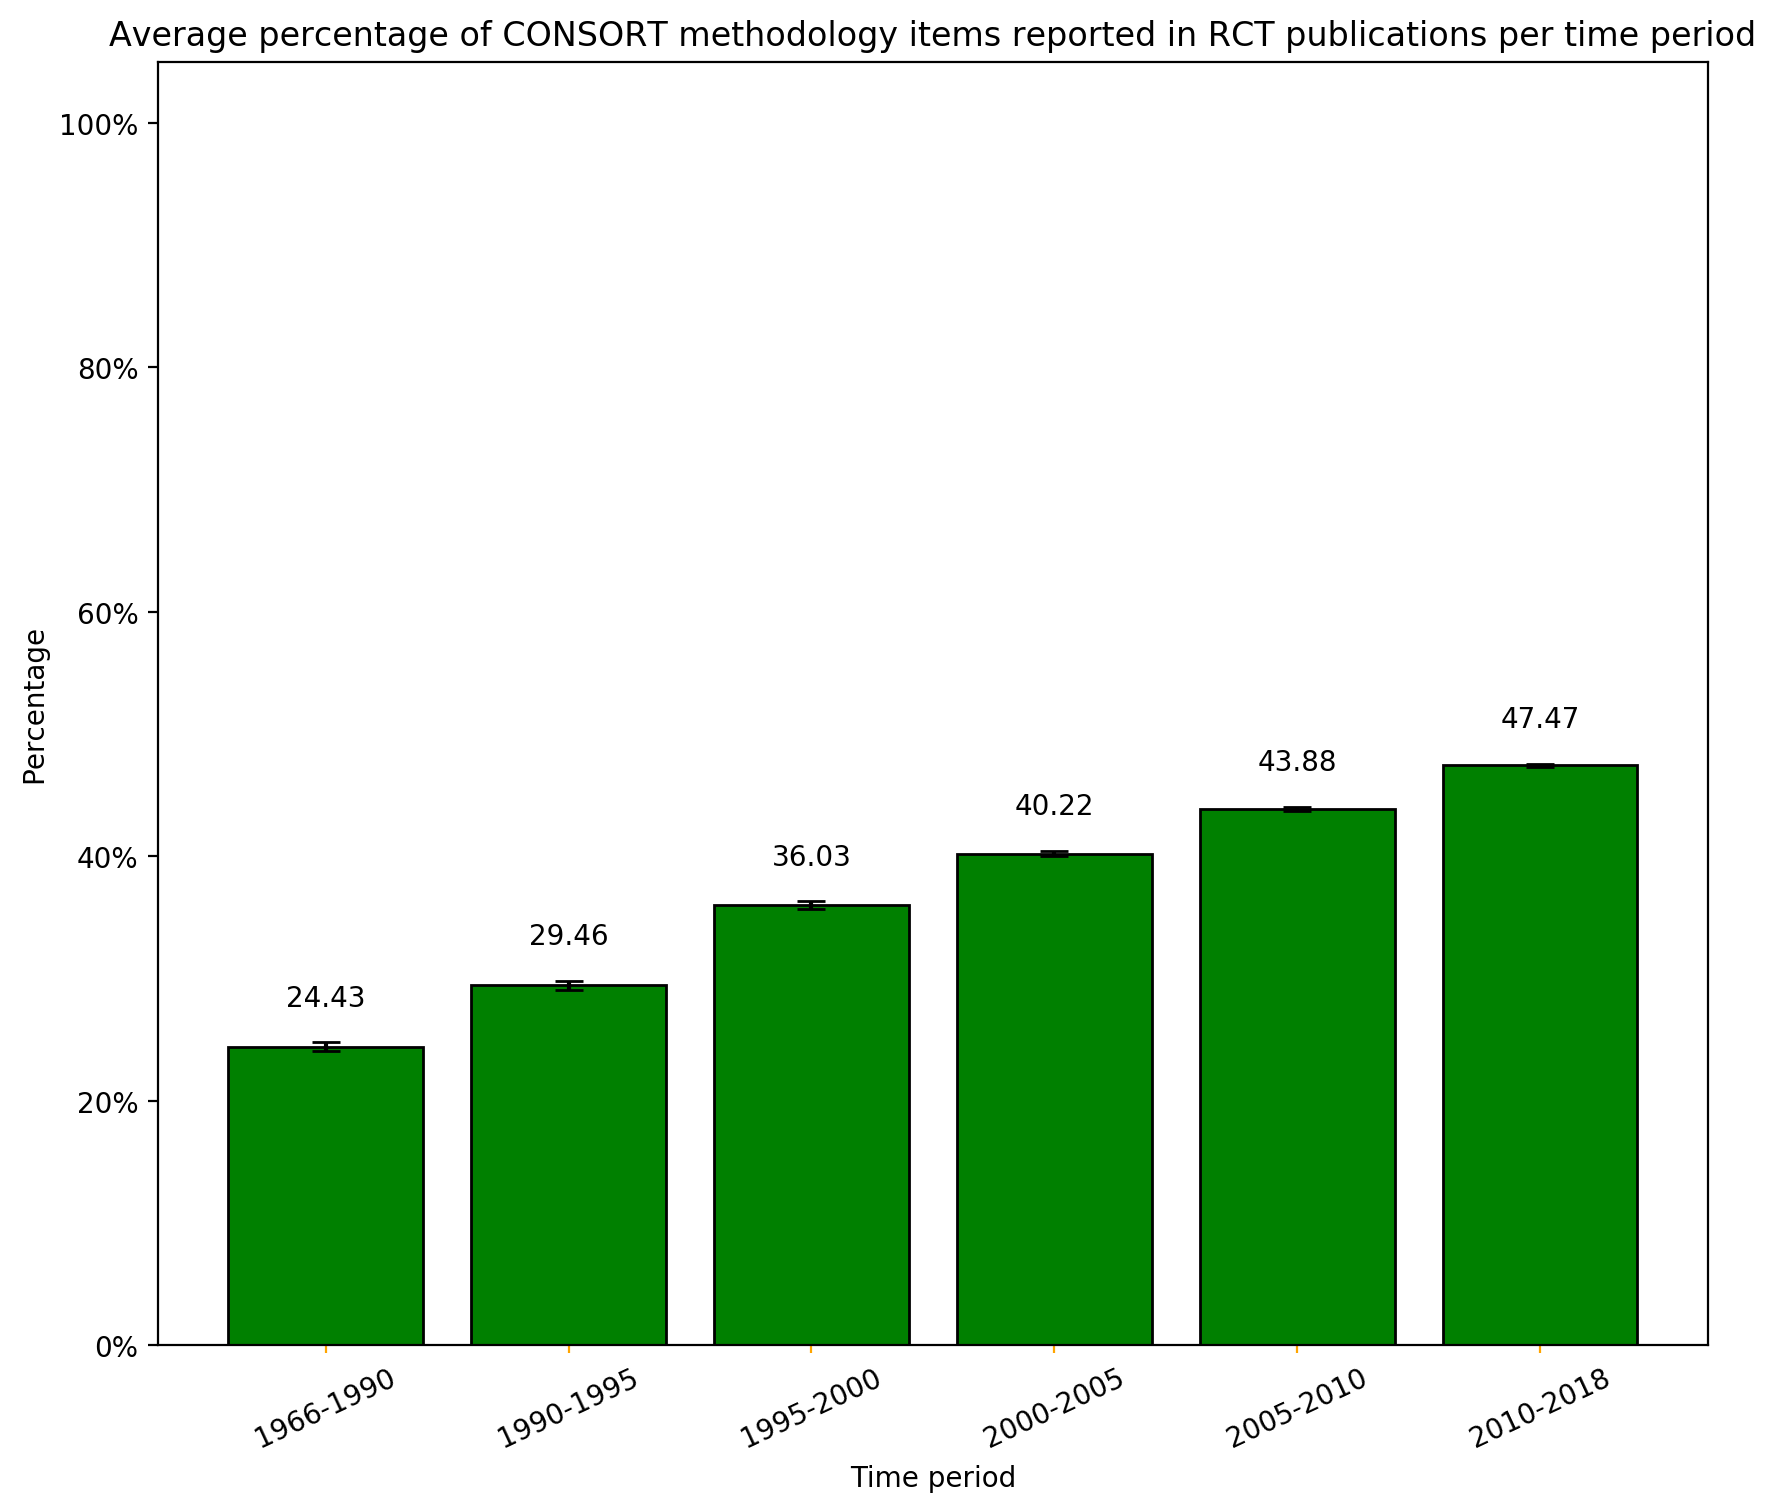

In [72]:
plot(year, [4, 5], 'Figures/')

In [4]:
displine = pd.read_excel('UTRECHT_addition_analysis.xlsx', 'displine bootstrap') 
displine = displine.sort_values(by=['Average percentage number of items reported in papers'], ascending=False)
displine

,Discipline,Average percentage number of items reported in papers,CI Lower bound,CI Upper bound,mean-low,up-mean
4,gynacology_reproduction,0.481039,0.476711,0.485504,0.004328,0.004465
11,pediatrics,0.475336,0.469478,0.481407,0.005859,0.006070
7,infectious,0.466078,0.460810,0.470860,0.005269,0.004781
3,general,0.463283,0.460229,0.466217,0.003053,0.002935
8,neurology,0.460744,0.456250,0.465540,0.004493,0.004796
2,gastroenterology_hepatology,0.459342,0.453906,0.464635,0.005437,0.005293
12,psychiatry,0.441448,0.438310,0.444906,0.003138,0.003458
9,oncology,0.438909,0.435601,0.442500,0.003308,0.003591
10,other,0.432802,0.431423,0.434234,0.001379,0.001431
6,immunology,0.428110,0.423064,0.432600,0.005046,0.004491


In [13]:
def addlabels(x,y, z):
    for i in range(len(x)):
        plt.text(i,z[i]+y[i]+3,round(y[i], 2), ha = 'center')

def plot(file, n, output_path):
    plt.figure(figsize=(20, 8.5), dpi=200)
    keys = list(file.iloc[:, 0])
    values = list([i*100 for i in file.iloc[:, 1]])
    error_low = list([i*100 for i in file.iloc[:, n[0]]])
    error_up = list([i*100 for i in file.iloc[:, n[1]]])
    errors = [error_low, error_up]
    display(plt.bar(keys, values, edgecolor = 'black', color='yellow', capsize=7))
    plt.errorbar(keys, values, yerr=errors, fmt="none", color="black", capsize=5)
#     display(plt.bar(keys, values, edgecolor = 'black', yerr=error, capsize=7, color='darkorange'))
    
    axes = plt.gca()
#     axes.set_xlim([x_min,x_max])
    axes.set_ylim([0,105])
    axes.set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]) 
    addlabels(keys, values, errors[1])
    plt.title('Average percentage of CONSORT methodology items reported in RCT publications by their medical discipline')
    plt.xticks(keys, keys, ha="center")
    plt.xlabel(file.columns[0])
    plt.ylabel("Percentage")
    plt.tick_params(axis='x', color='orange', length=3, labelrotation=25)
    # plt.setp( axes.xaxis.get_majorticklabels(), rotation=45 )
    plt.savefig(output_path + file.iloc[0,0] + ".png", bbox_inches='tight')
    
#     plt.show()

<BarContainer object of 15 artists>

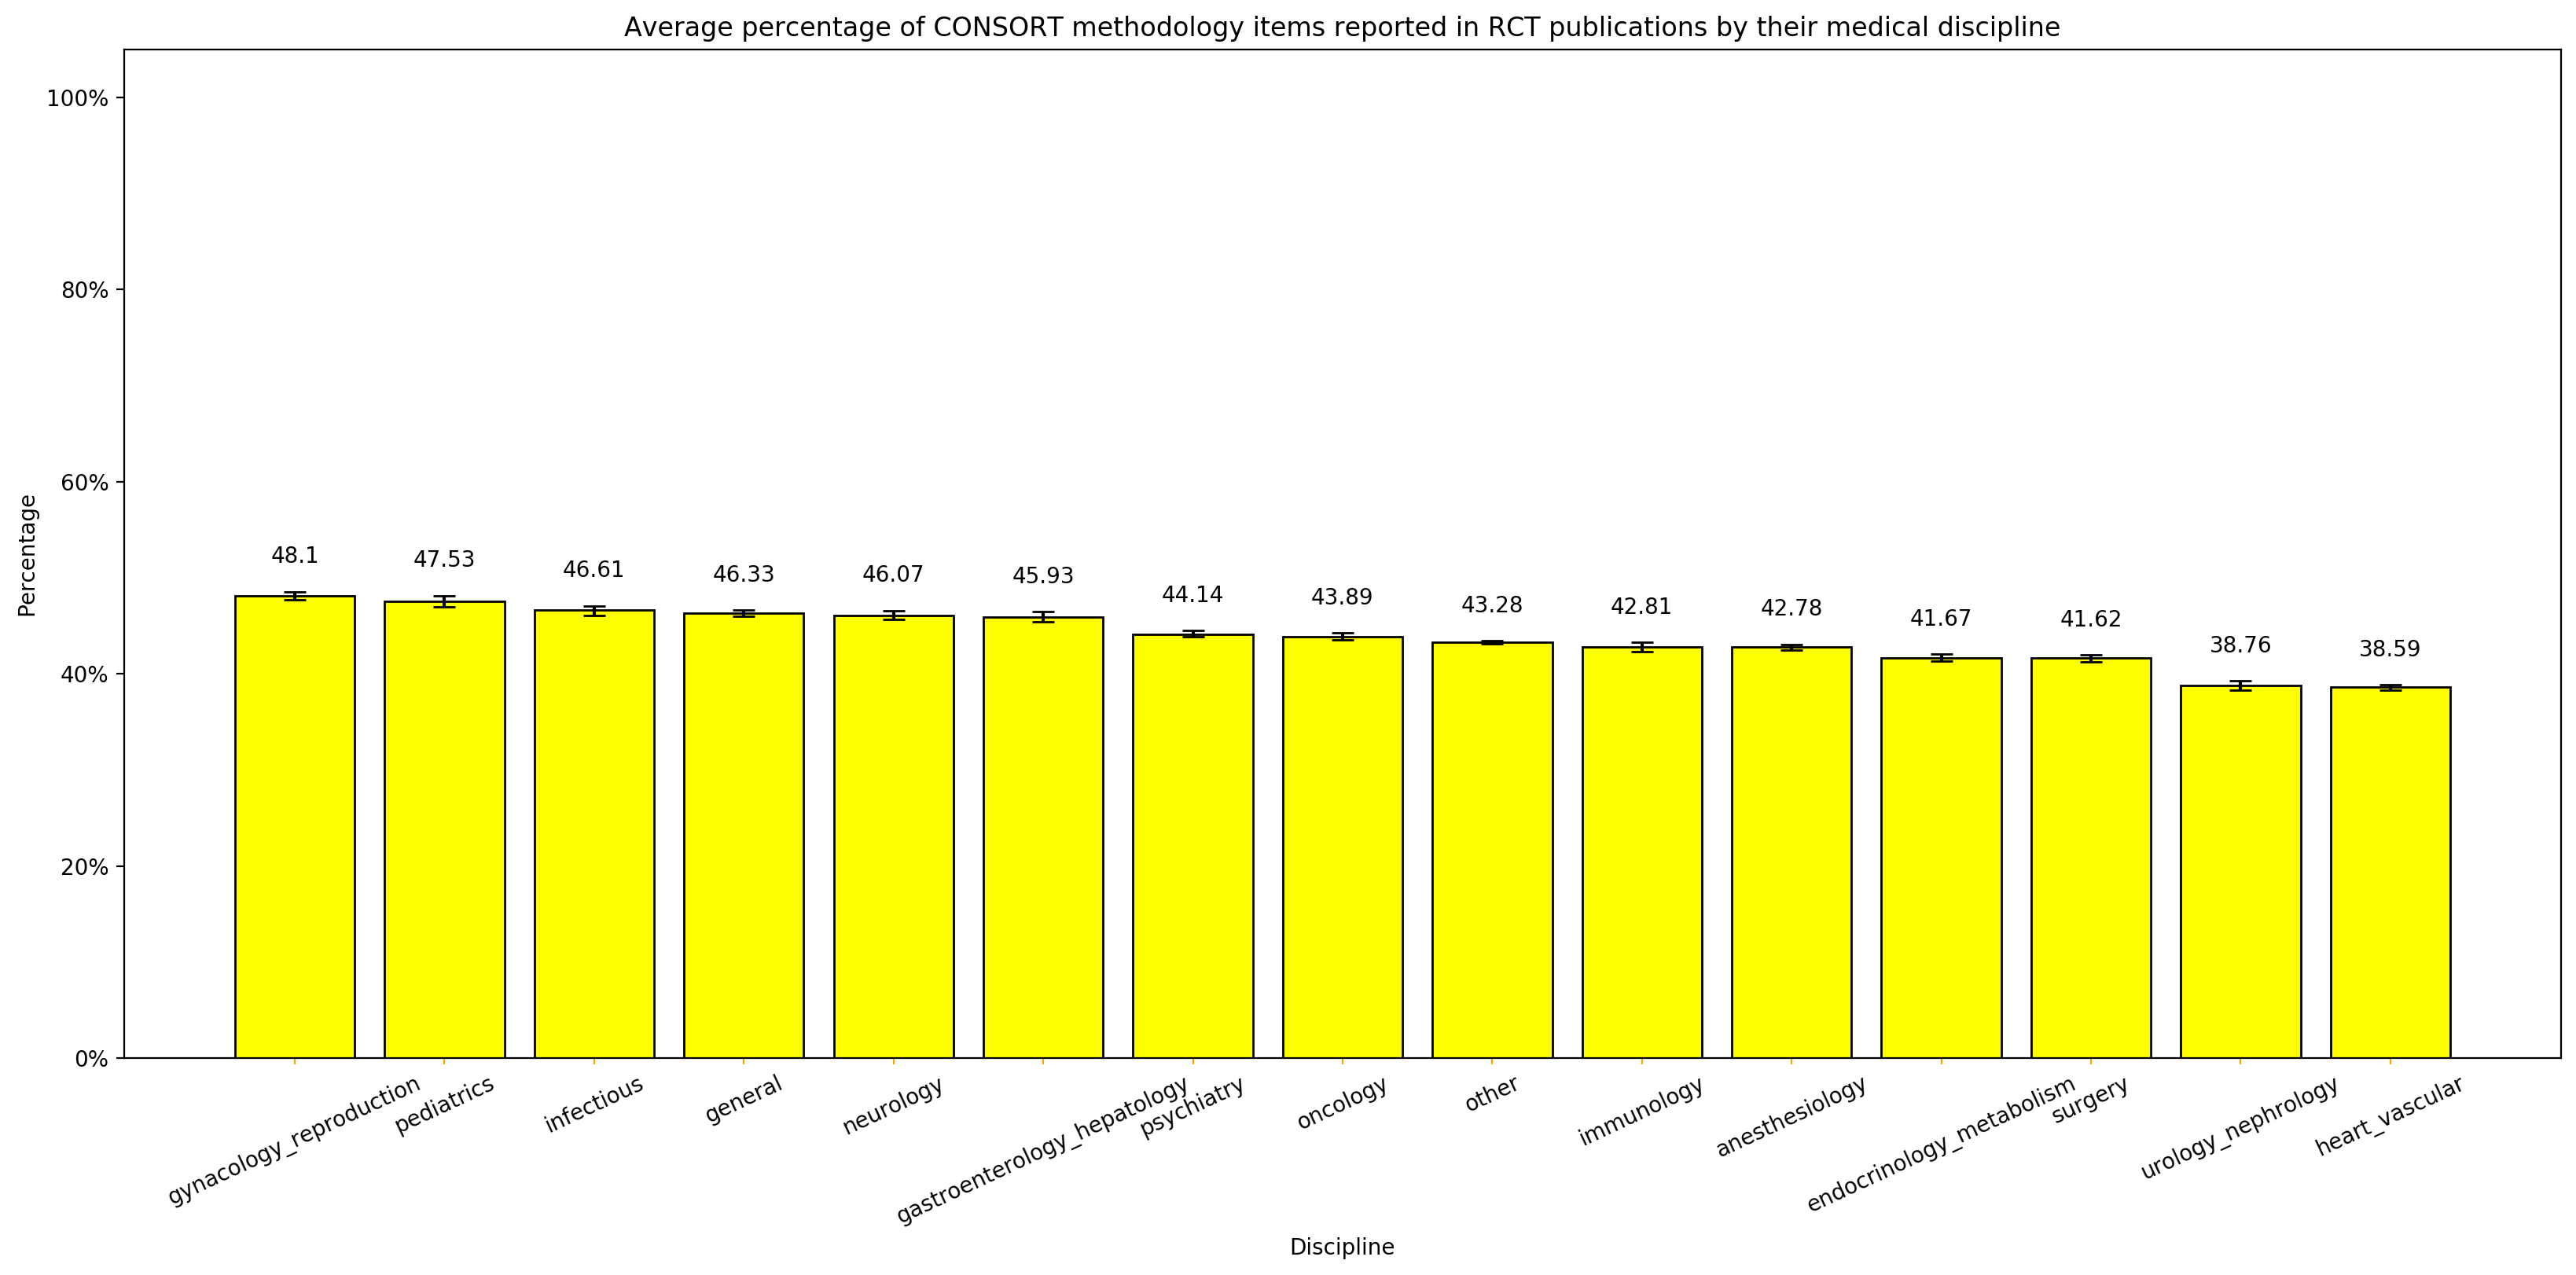

In [14]:
plot(displine, [4, 5], 'Figures/')

In [8]:
CONSORT_items = pd.read_excel('UTRECHT_addition_analysis.xlsx',header=0, sheet_name='CONSORT items bootstrap')

In [9]:
CONSORT_items

,CONSORT Item,Period,Percentage number of papers reported per period,CI Lower bound,CI Upper bound,mean-lowci,upci-mean
0,3a (Trial Design),1966-1990,0.235771,0.225017,0.246861,0.010754,0.011090
1,3a (Trial Design),1990-1995,0.294987,0.283732,0.305913,0.011255,0.010925
2,3a (Trial Design),1995-2000,0.349564,0.340736,0.358696,0.008828,0.009132
3,3a (Trial Design),2000-2005,0.394127,0.387775,0.400275,0.006352,0.006148
4,3a (Trial Design),2005-2010,0.441174,0.436307,0.445815,0.004867,0.004642
...,...,...,...,...,...,...,...
85,12b (Statistical Methods for Other Analyses),1990-1995,0.055752,0.050446,0.061058,0.005306,0.005306
86,12b (Statistical Methods for Other Analyses),1995-2000,0.111280,0.105194,0.117671,0.006086,0.006391
87,12b (Statistical Methods for Other Analyses),2000-2005,0.165223,0.160397,0.169719,0.004827,0.004496
88,12b (Statistical Methods for Other Analyses),2005-2010,0.218389,0.214212,0.222515,0.004177,0.004125


In [20]:
def addlabels(x,y,z):
    for i in range(len(x)):
        plt.text(i,y[i]+z[i]+3,round(y[i], 2), ha = 'center')

def plot(file, n, output_path, label):
    color_index = {'3a':'rosybrown', '4a':'yellowgreen', '4b':'yellowgreen', '5':'lightsalmon', '6a':'burlywood', '7a':'lightpink', '7b':'lightpink', 
                   '8a':'darkseagreen', '8b':'darkseagreen', '9':'tan', '10':'skyblue', 
                   '11a':'bisque', '11b':'bisque', '12a':'thistle', '12b':'thistle'}
    plt.figure(figsize=(10, 8.5), dpi=200)
    keys = list(file.iloc[:, 0])
    values = list([i*100 for i in file.iloc[:, 1]])
    error_low = list([i*100 for i in file.iloc[:, n[0]]])
    error_up = list([i*100 for i in file.iloc[:, n[1]]])
    errors = [error_low,error_up]
    
    display(plt.bar(keys, values, edgecolor = 'black', color=color_index[str(label).split()[0]], capsize=7))
    plt.errorbar(keys, values, yerr=errors, fmt="none", color="black", capsize=5)
    axes = plt.gca() 
#     axes.set_xlim([x_min,x_max])
    axes.set_ylim([0,105])
    axes.set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]) 
    addlabels(keys, values, errors[1])
    # axes.text(n + .25, v + 3, str(v), color='blue', fontweight='bold')
    plt.title(label)
    # plt.title(item)
    
    plt.xticks(keys, keys, ha="center")
    plt.xlabel(file.columns[0])
    plt.ylabel("Percentage")
    plt.tick_params(axis='x', color='orange', length=3, labelrotation=25)
    # plt.setp( axes.xaxis.get_majorticklabels(), rotation=45 )
#     plt.subplots_adjust(wspace=0.0, hspace=0, right=0.7)
    plt.savefig(output_path + label.split()[0] + ".png", bbox_inches='tight')
    
    plt.show()

<BarContainer object of 6 artists>

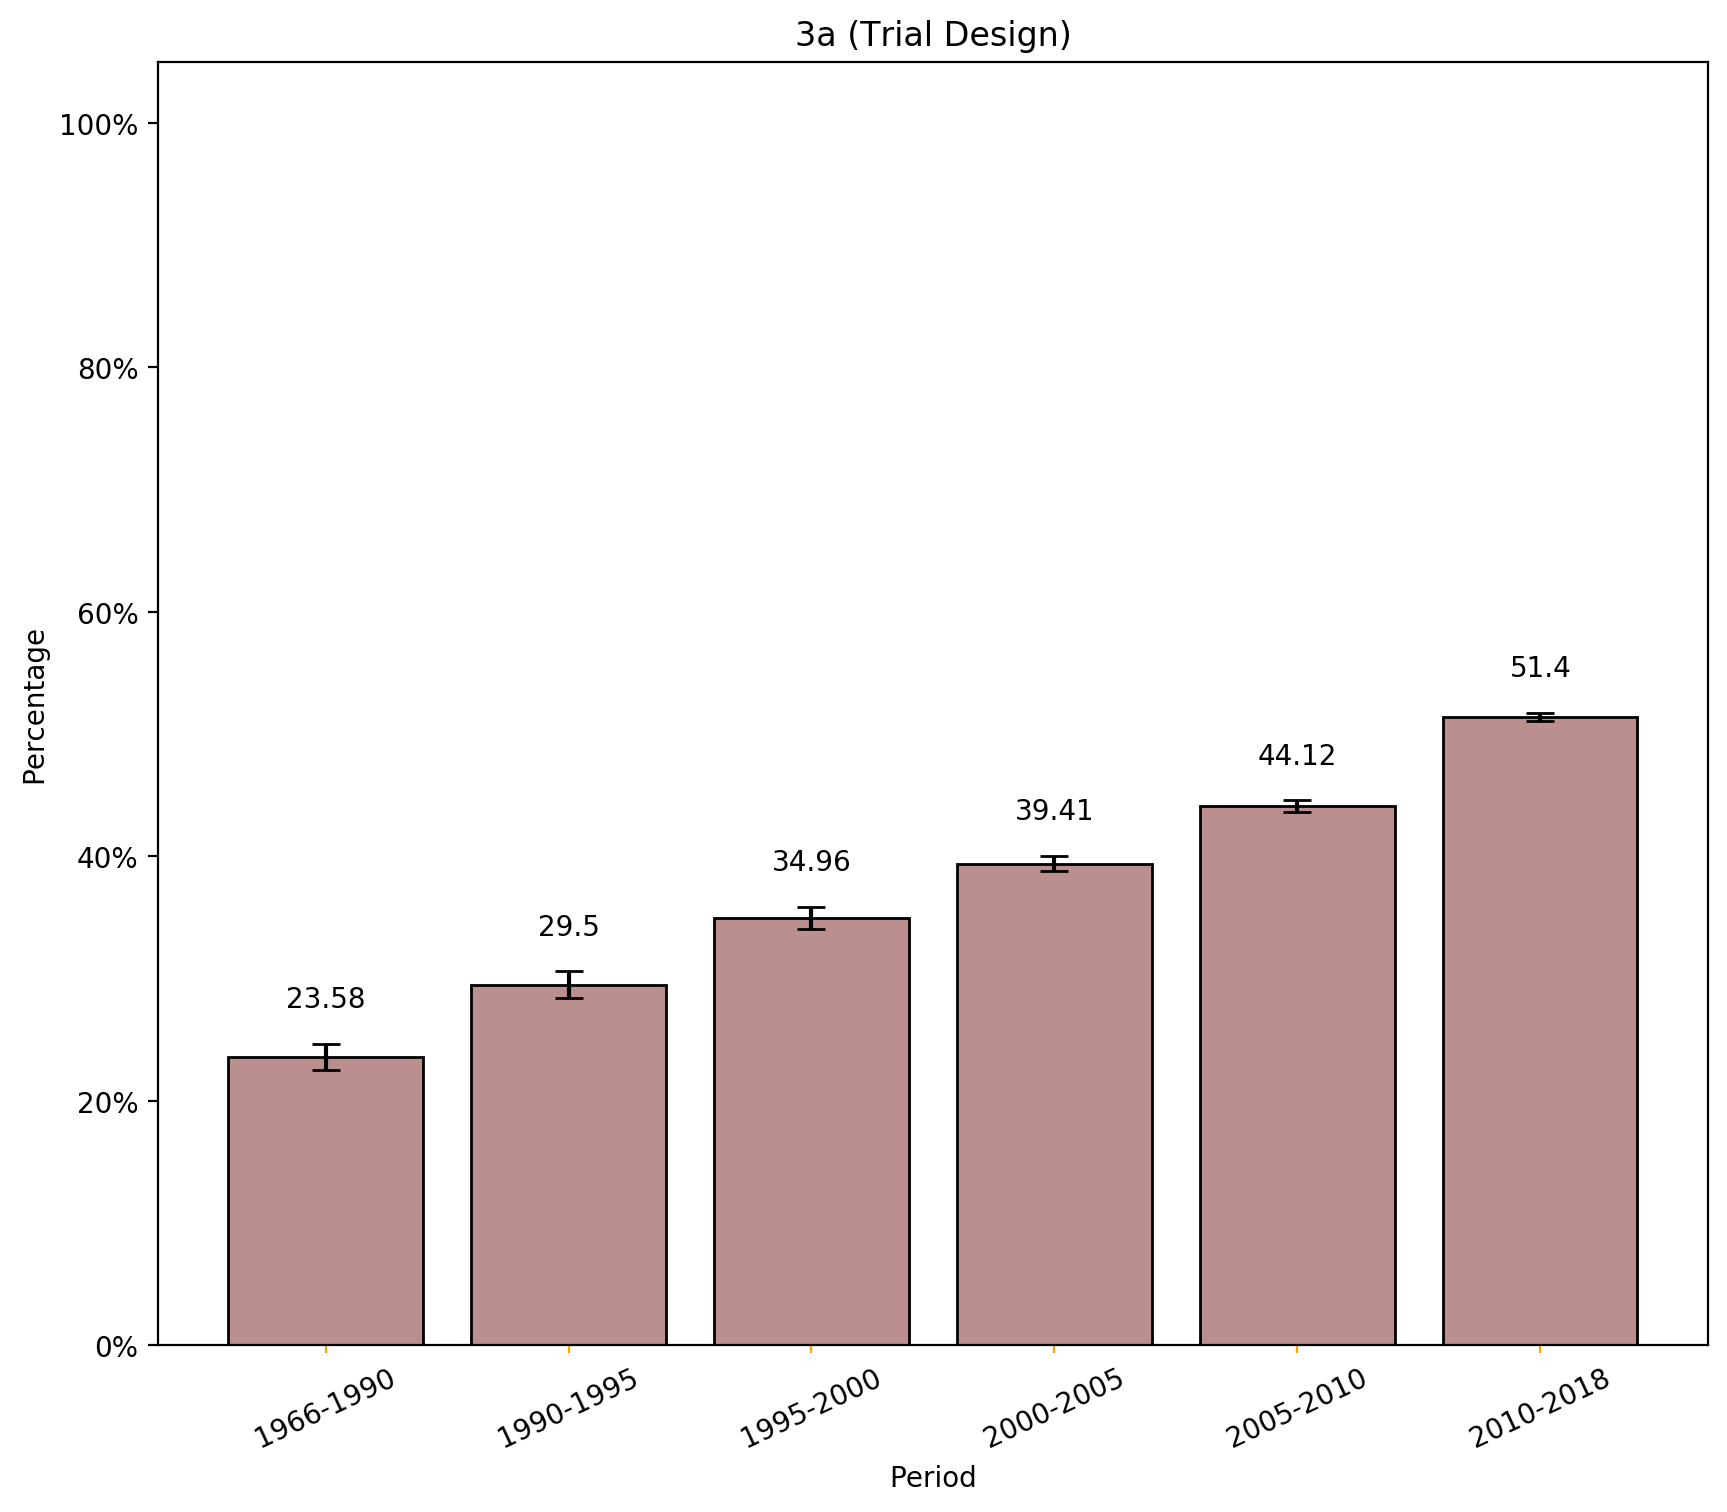

<BarContainer object of 6 artists>

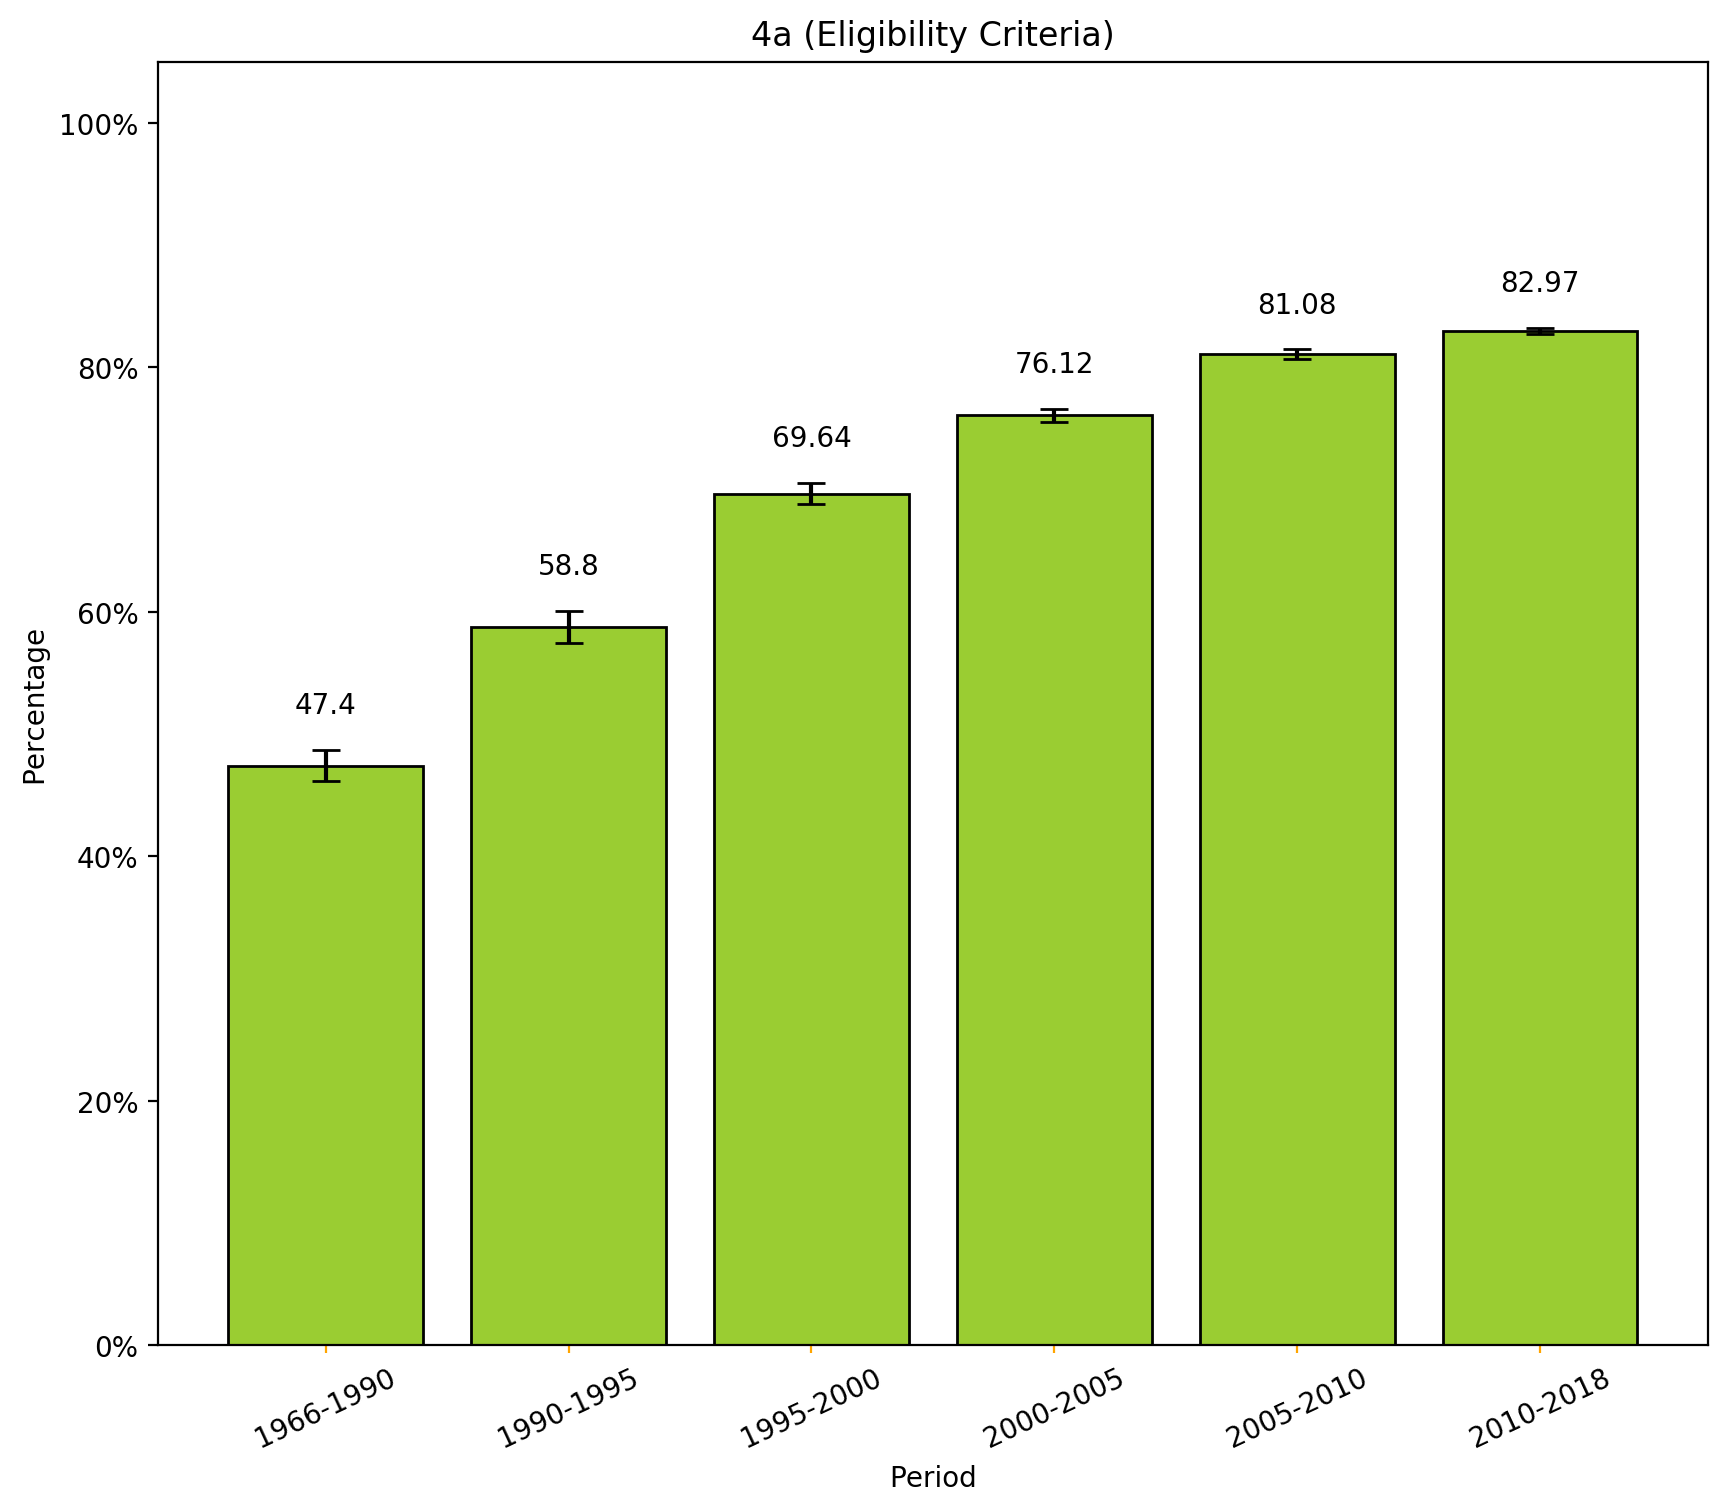

<BarContainer object of 6 artists>

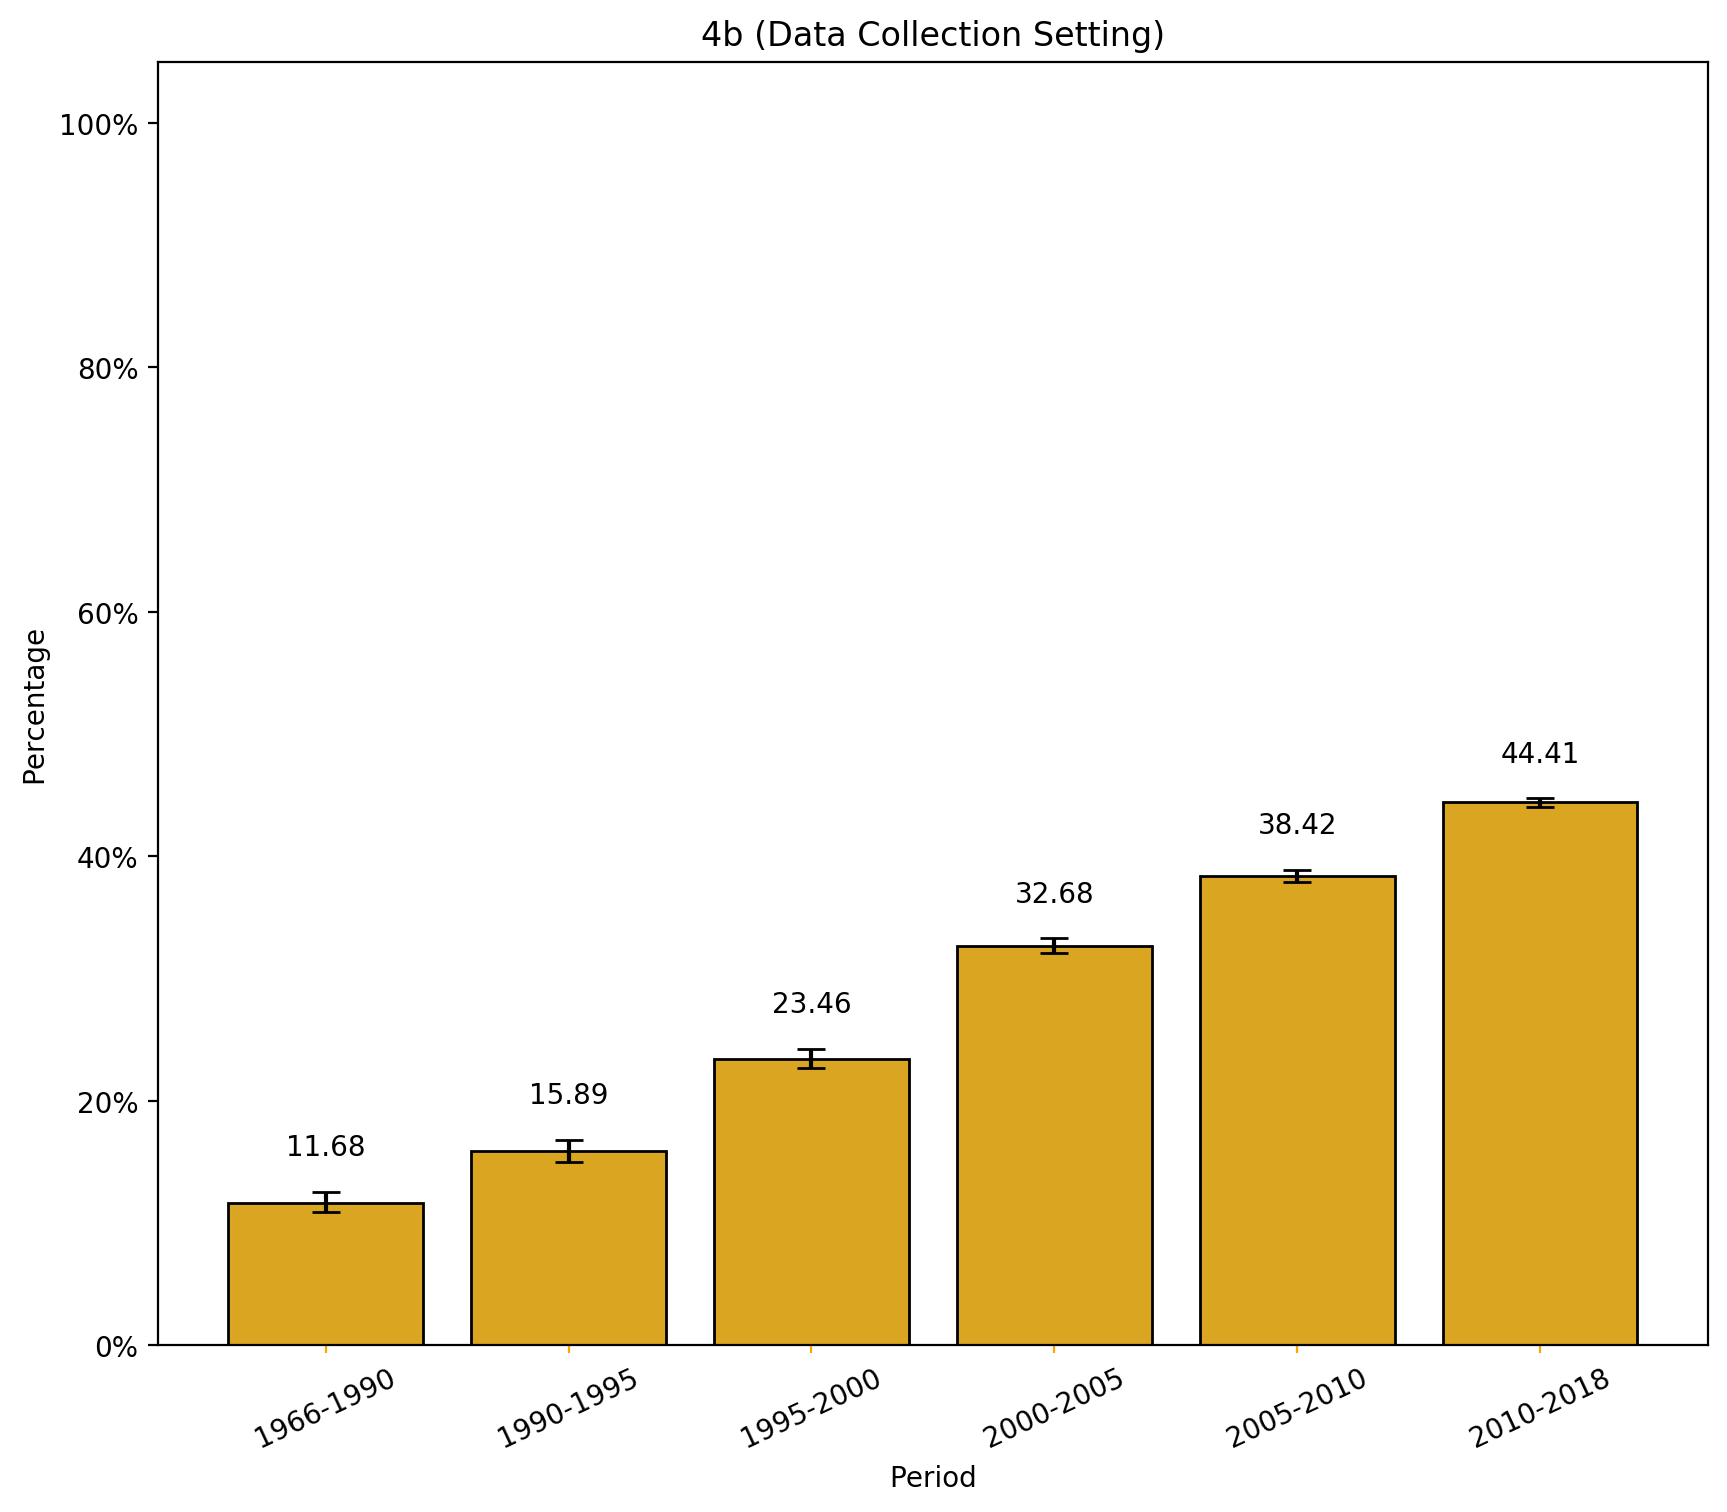

<BarContainer object of 6 artists>

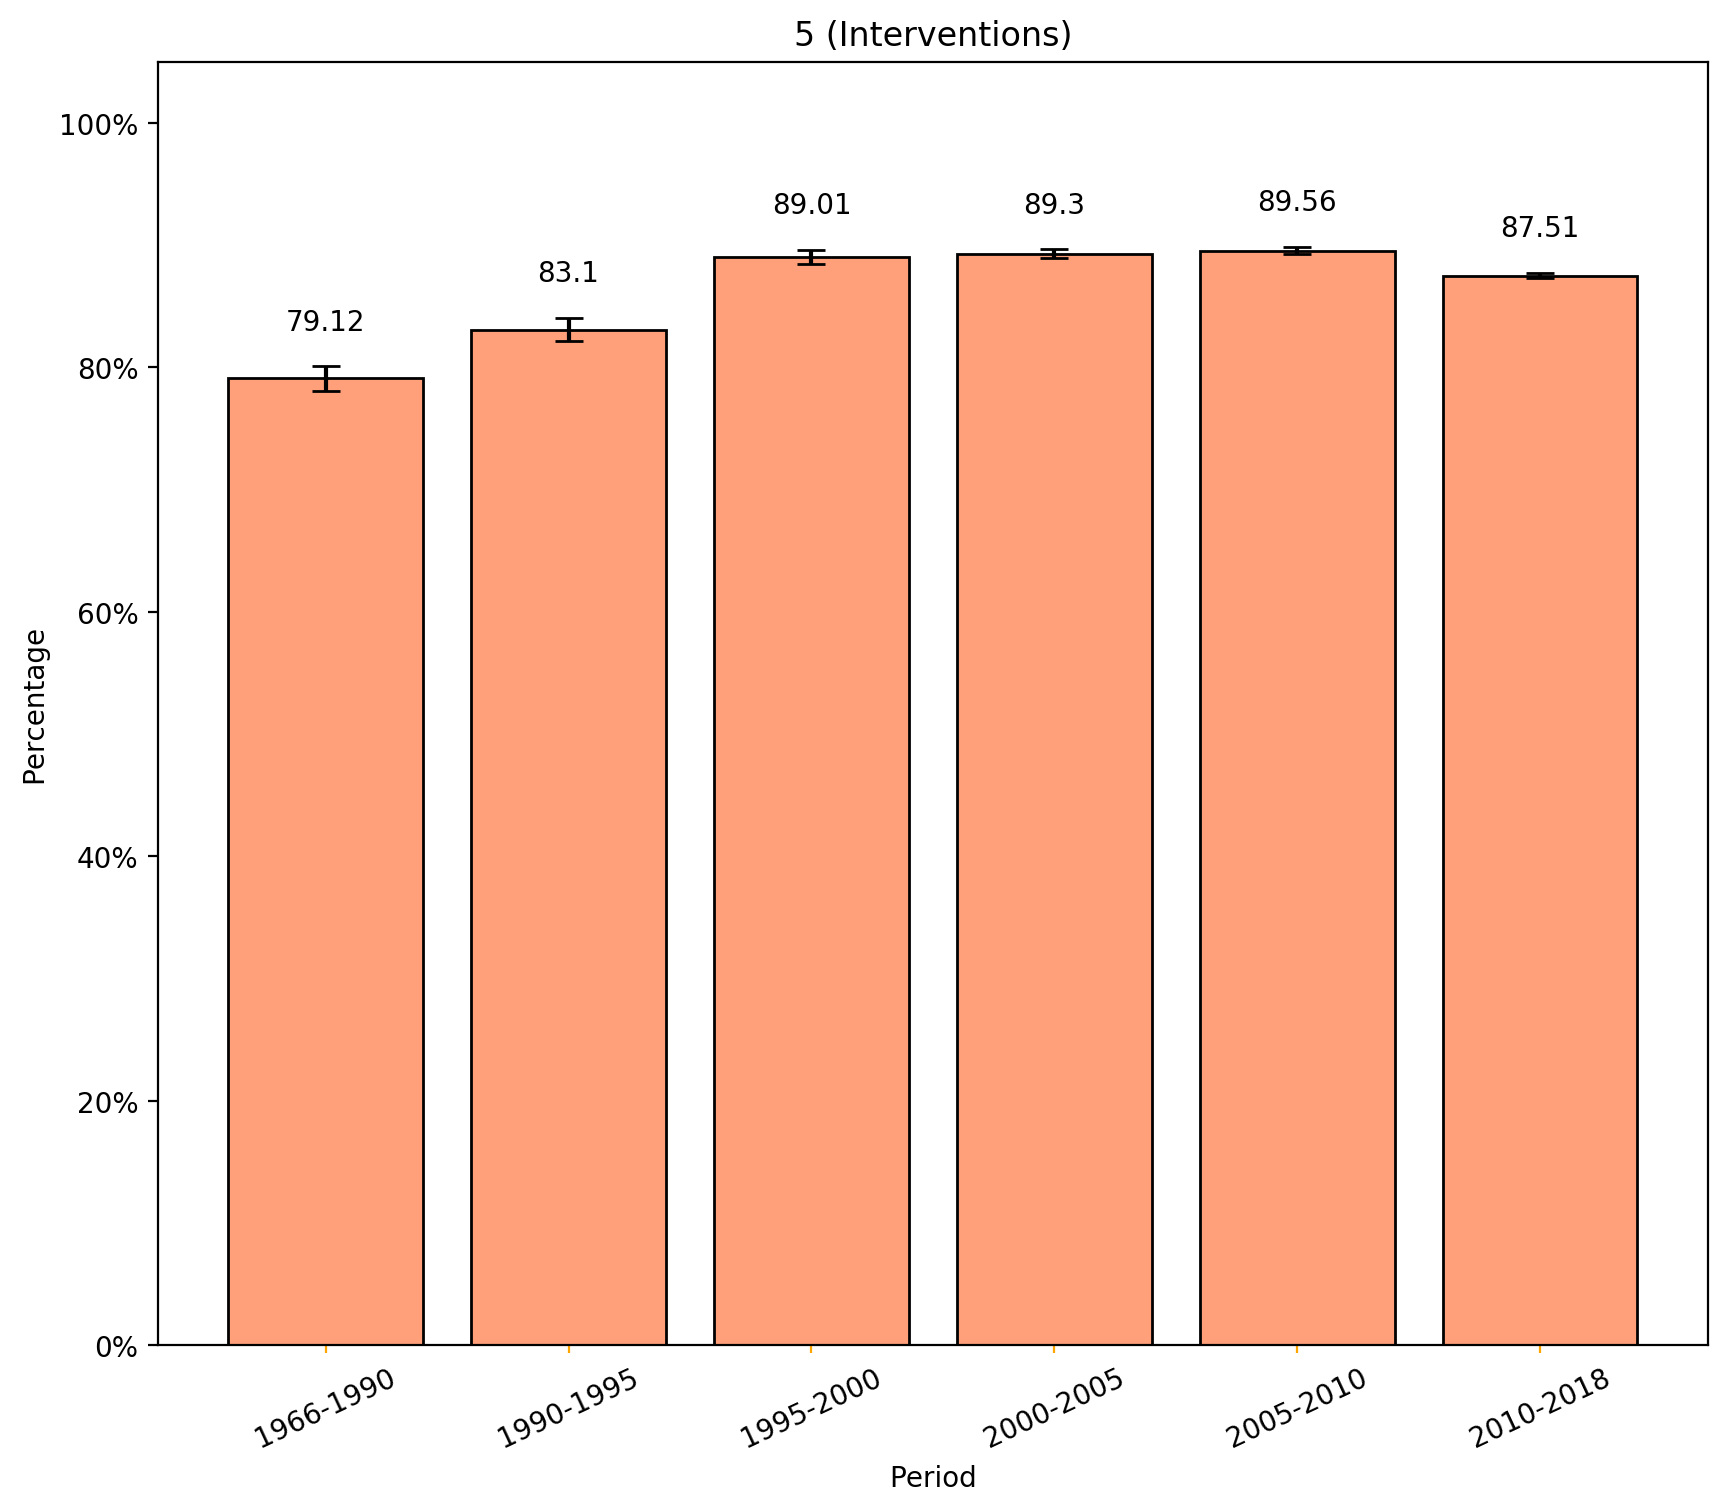

<BarContainer object of 6 artists>

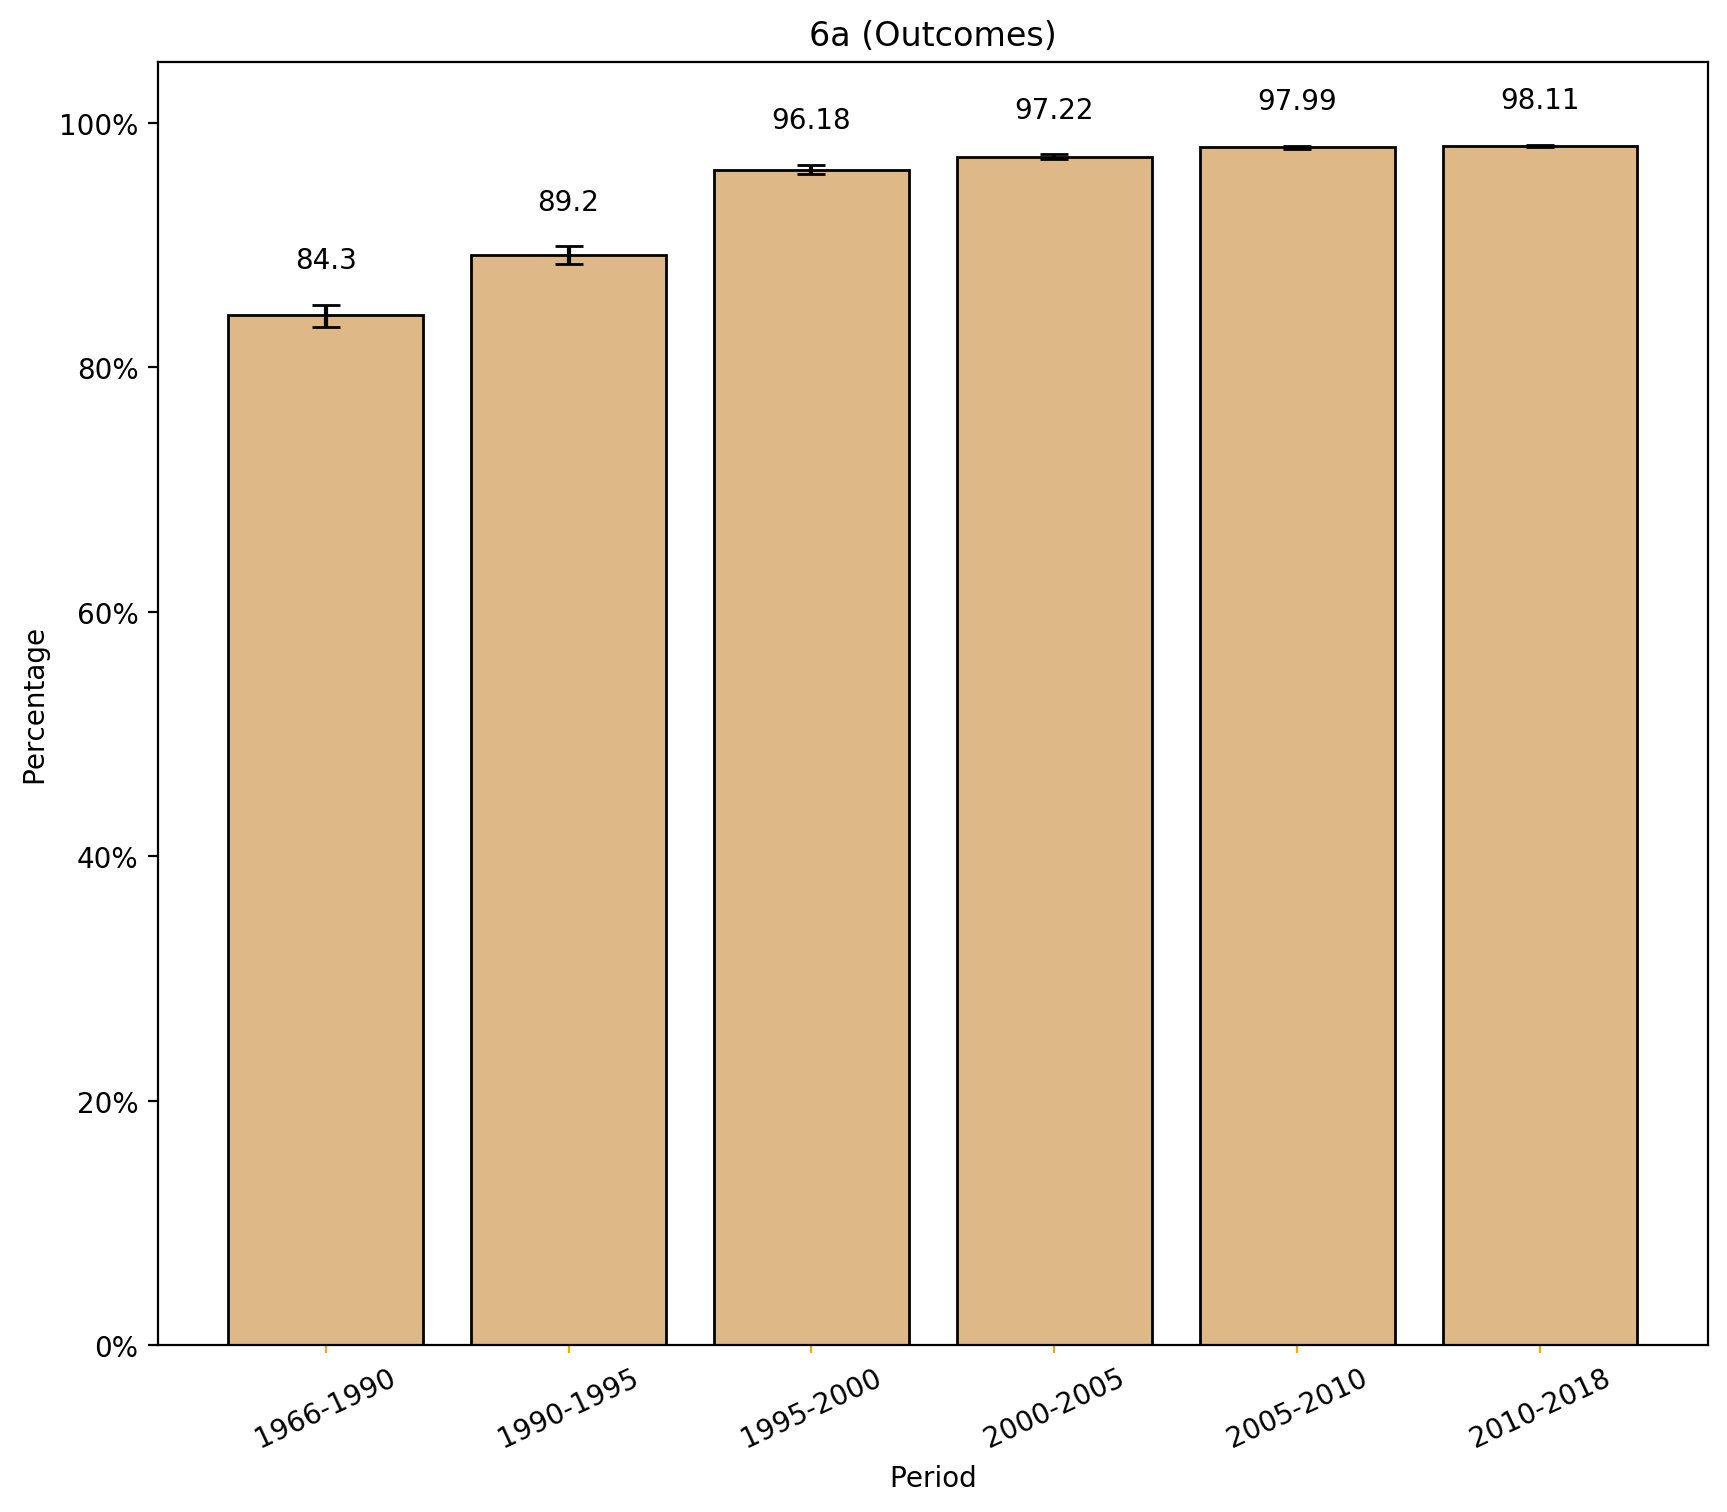

<BarContainer object of 6 artists>

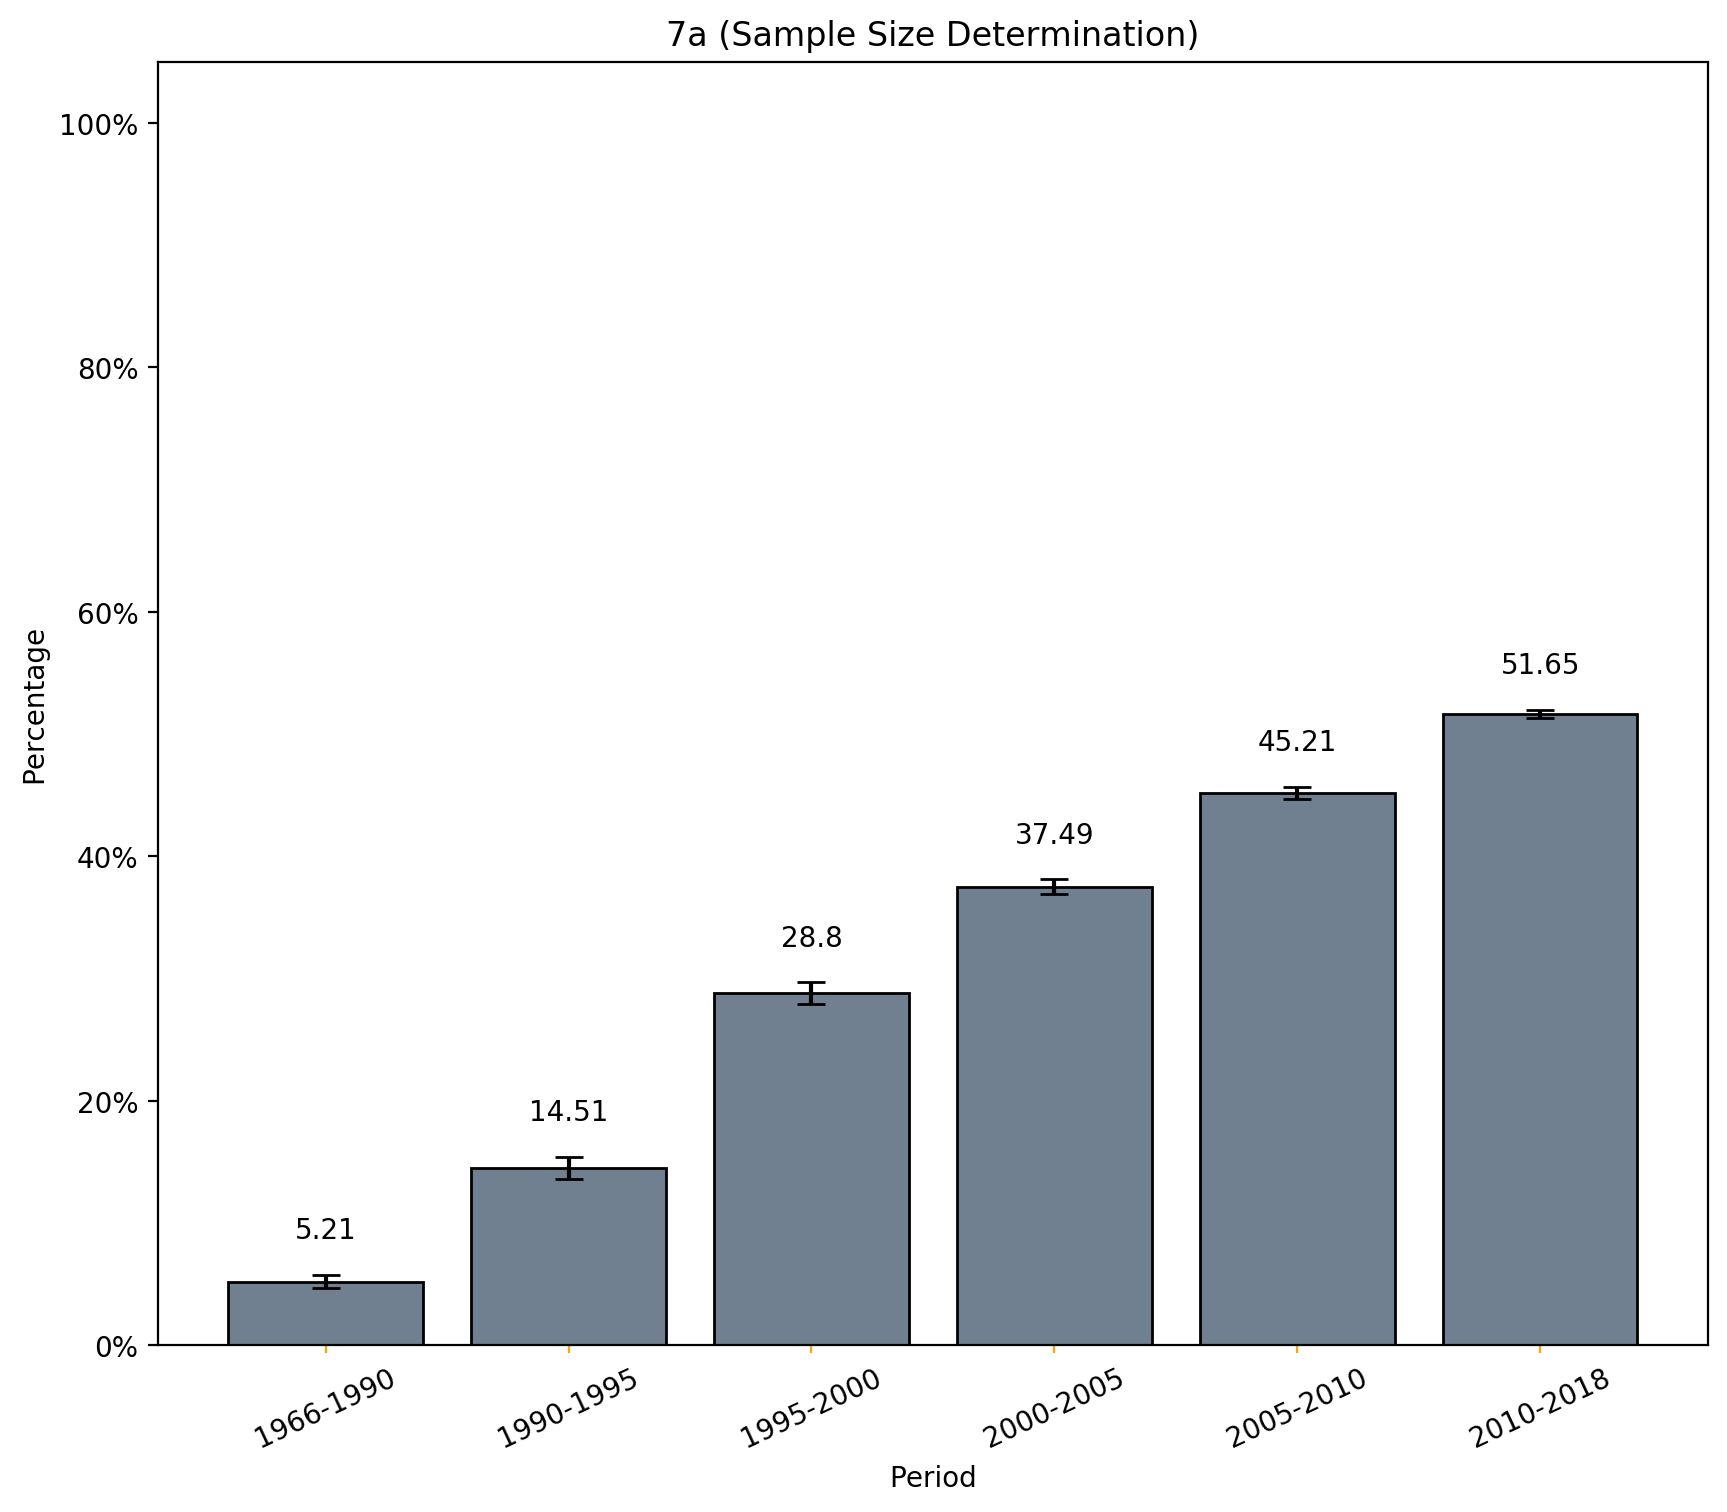

<BarContainer object of 6 artists>

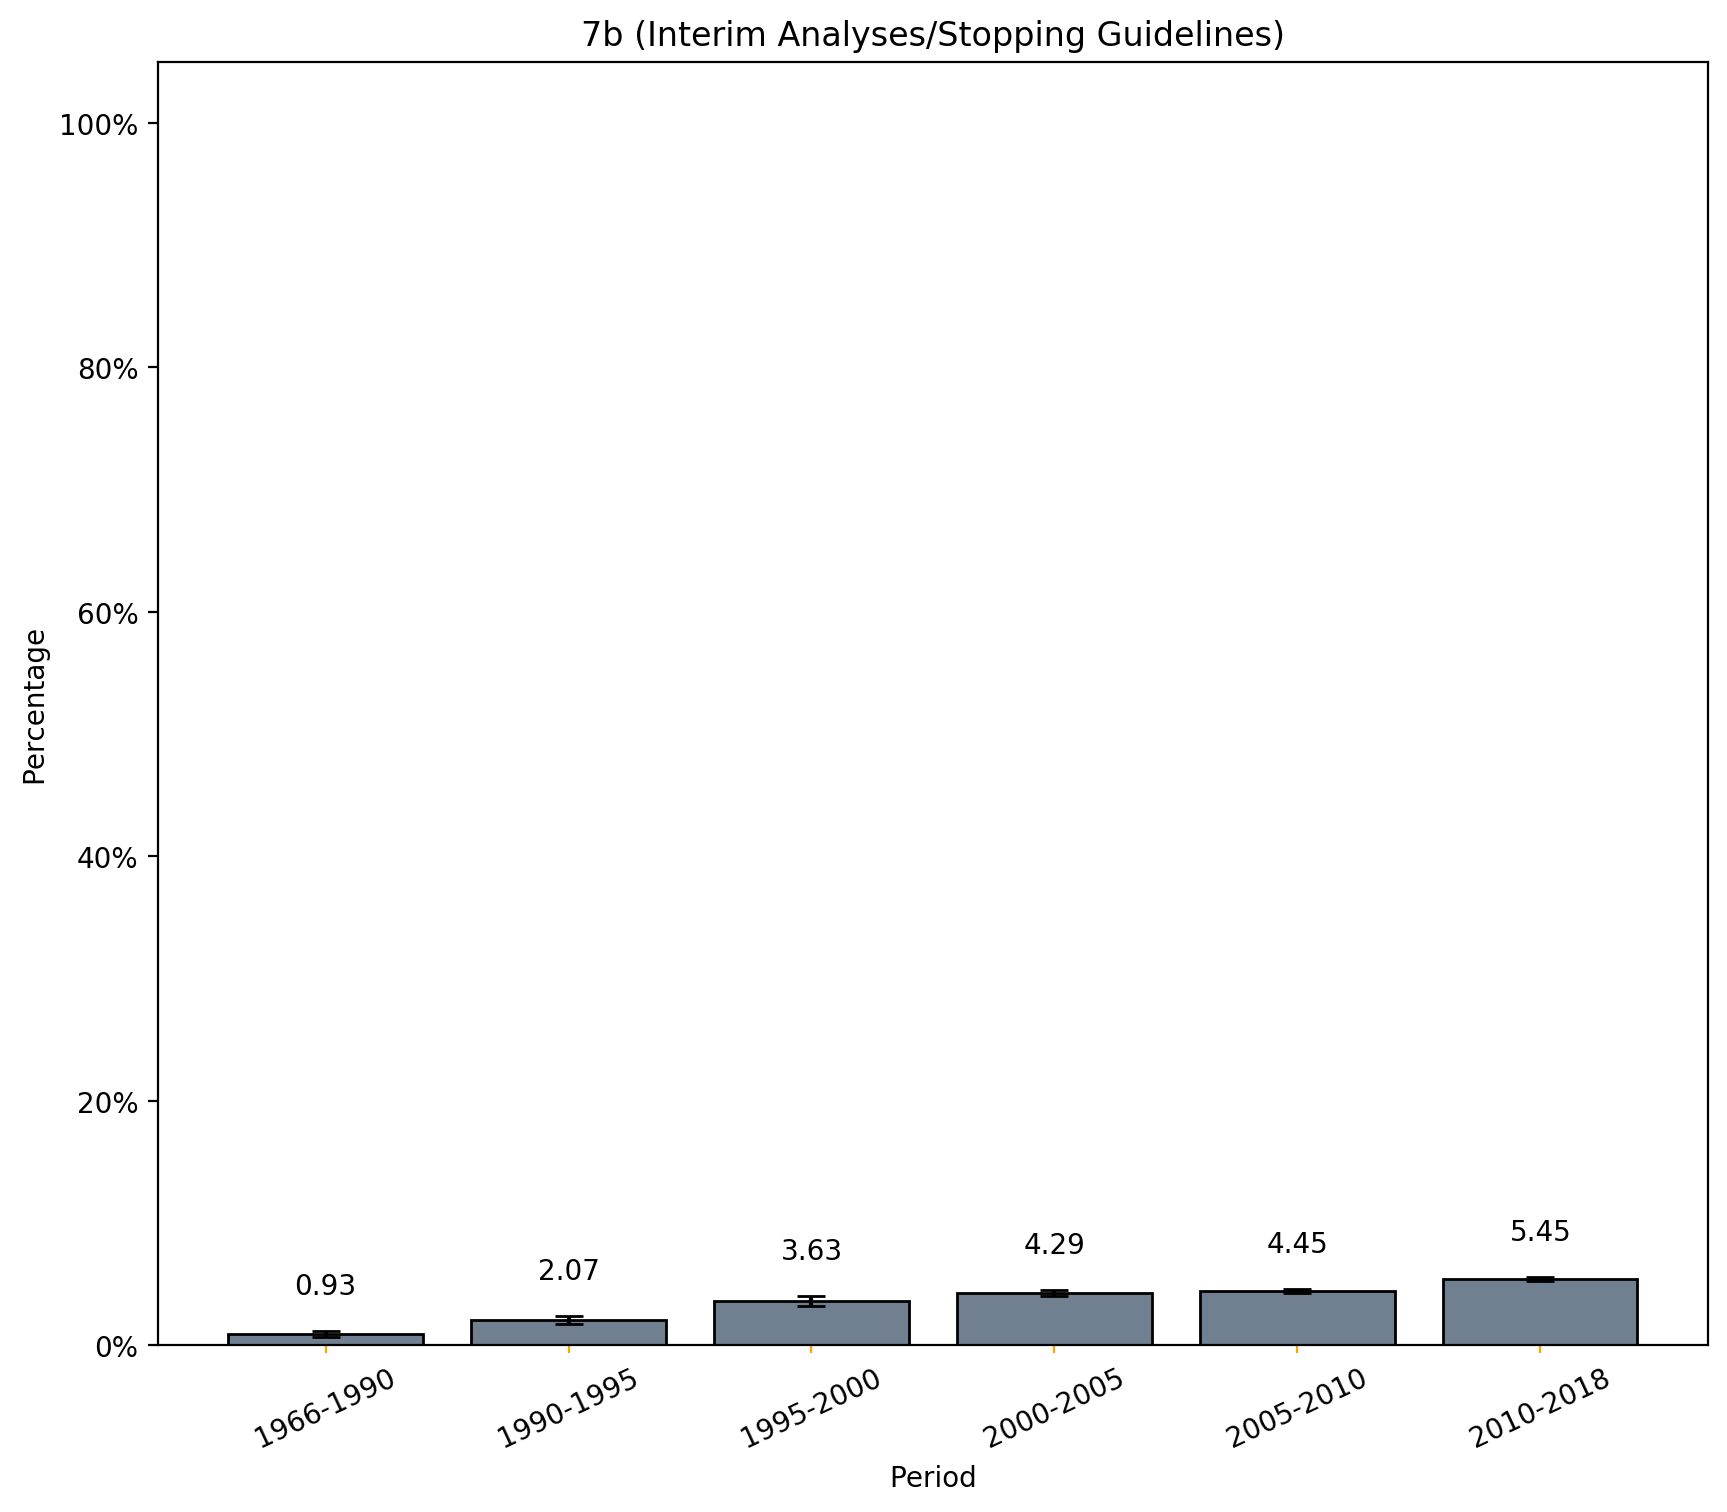

<BarContainer object of 6 artists>

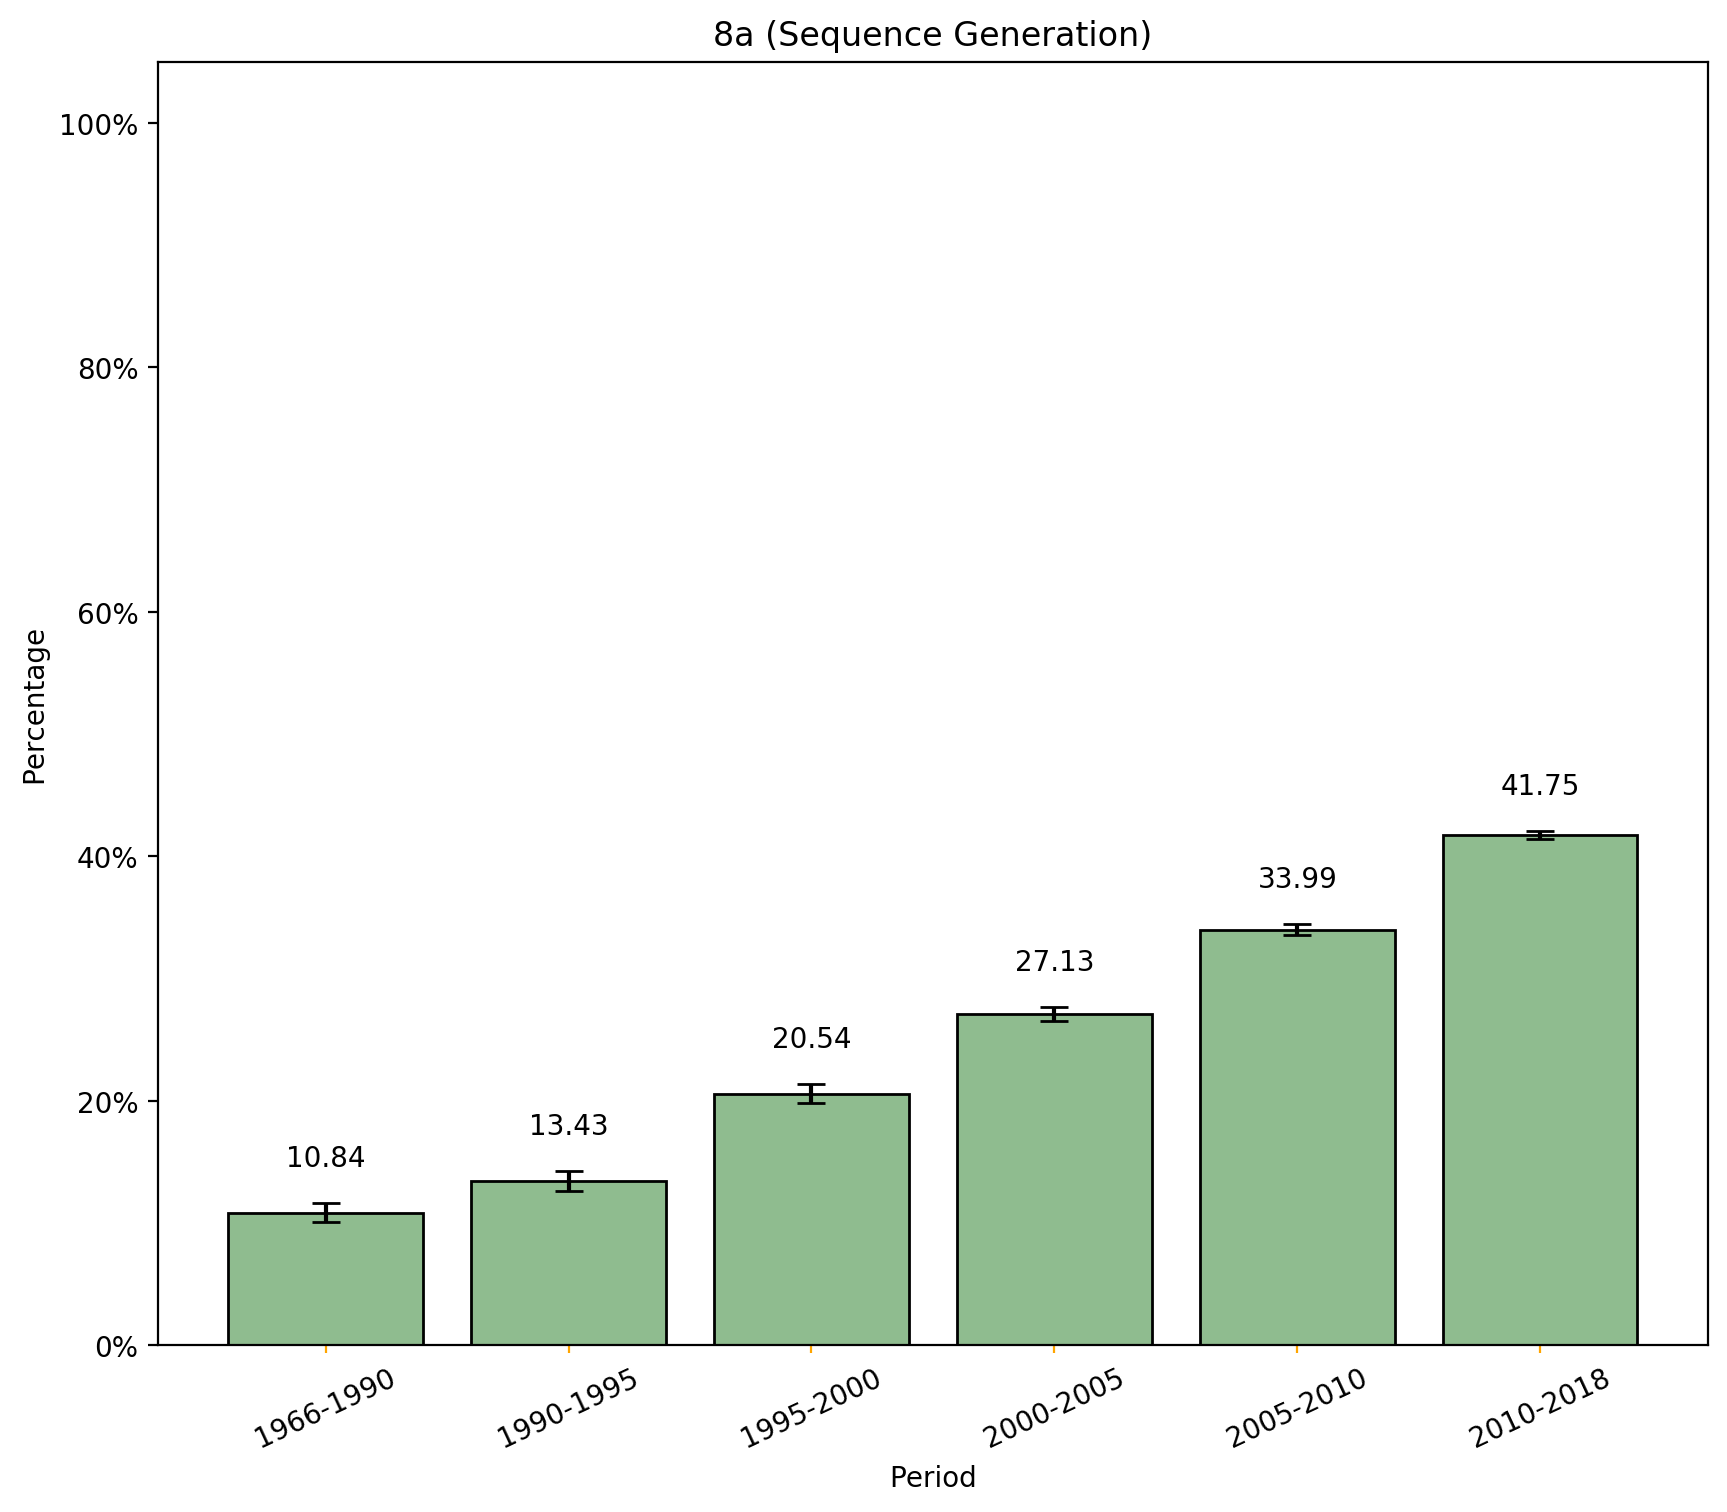

<BarContainer object of 6 artists>

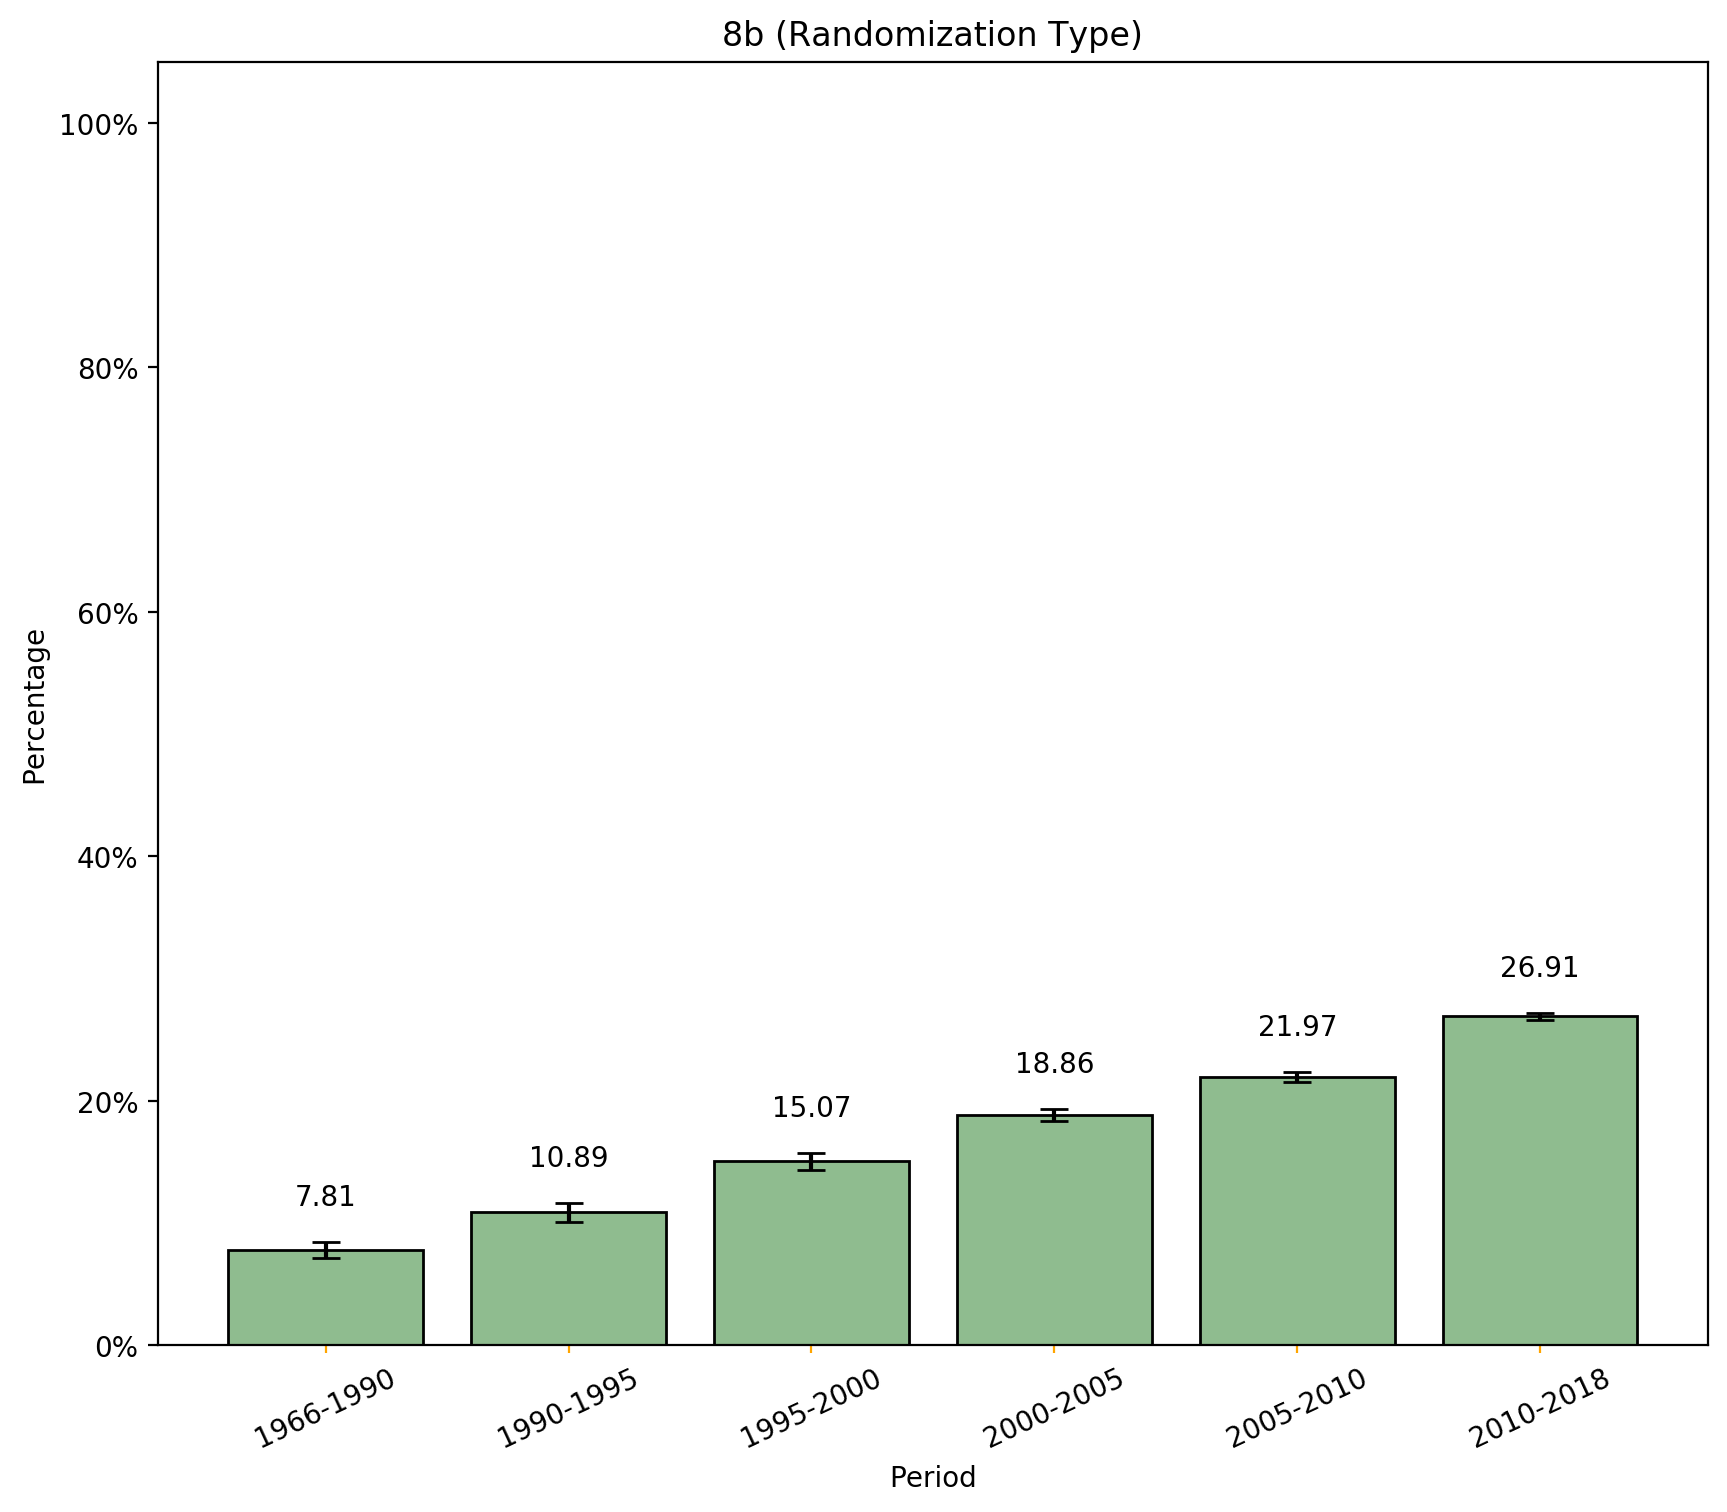

<BarContainer object of 6 artists>

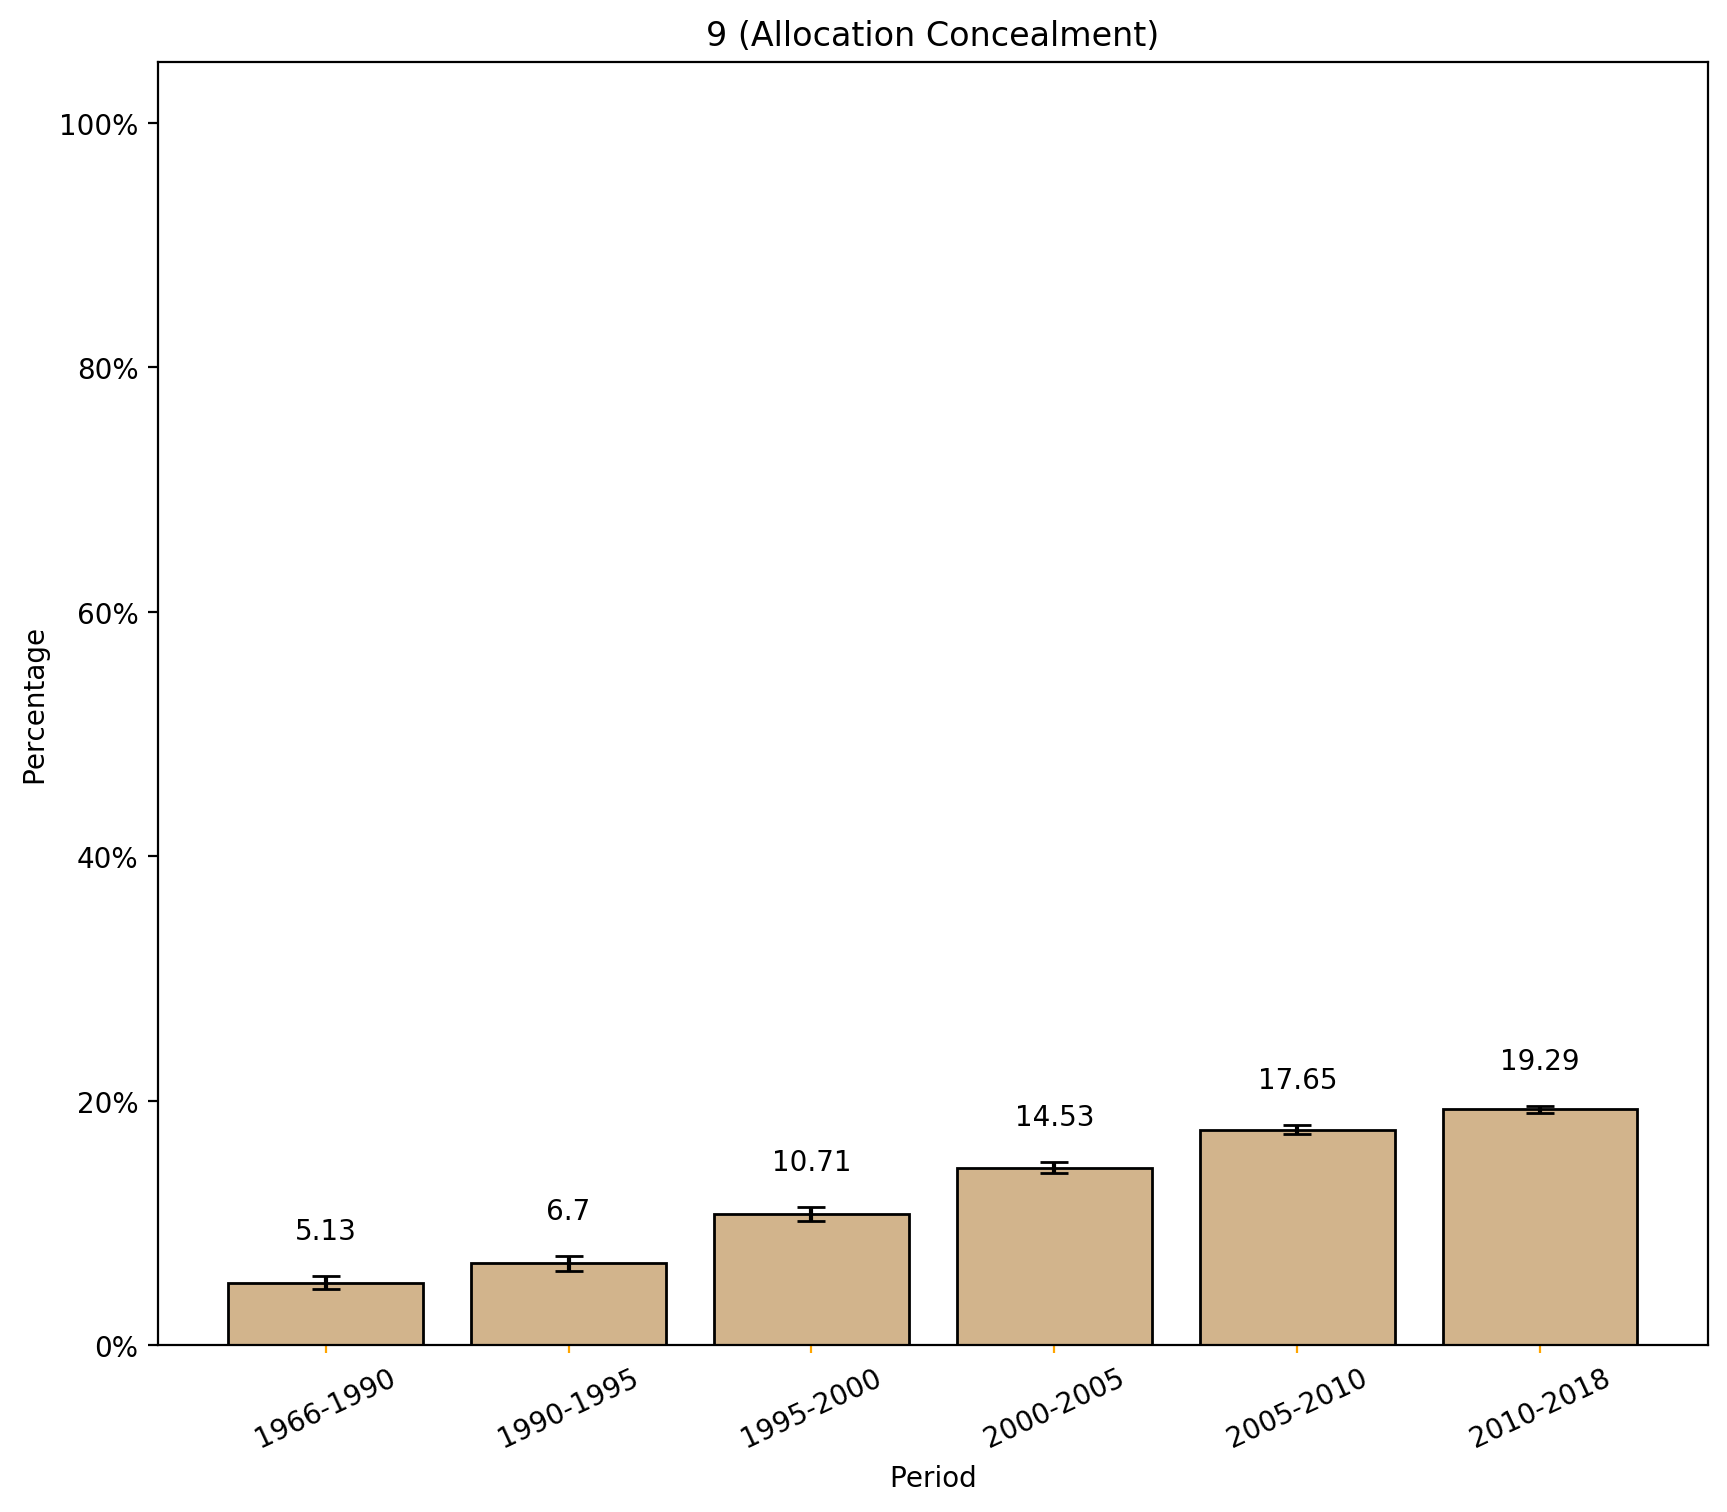

<BarContainer object of 6 artists>

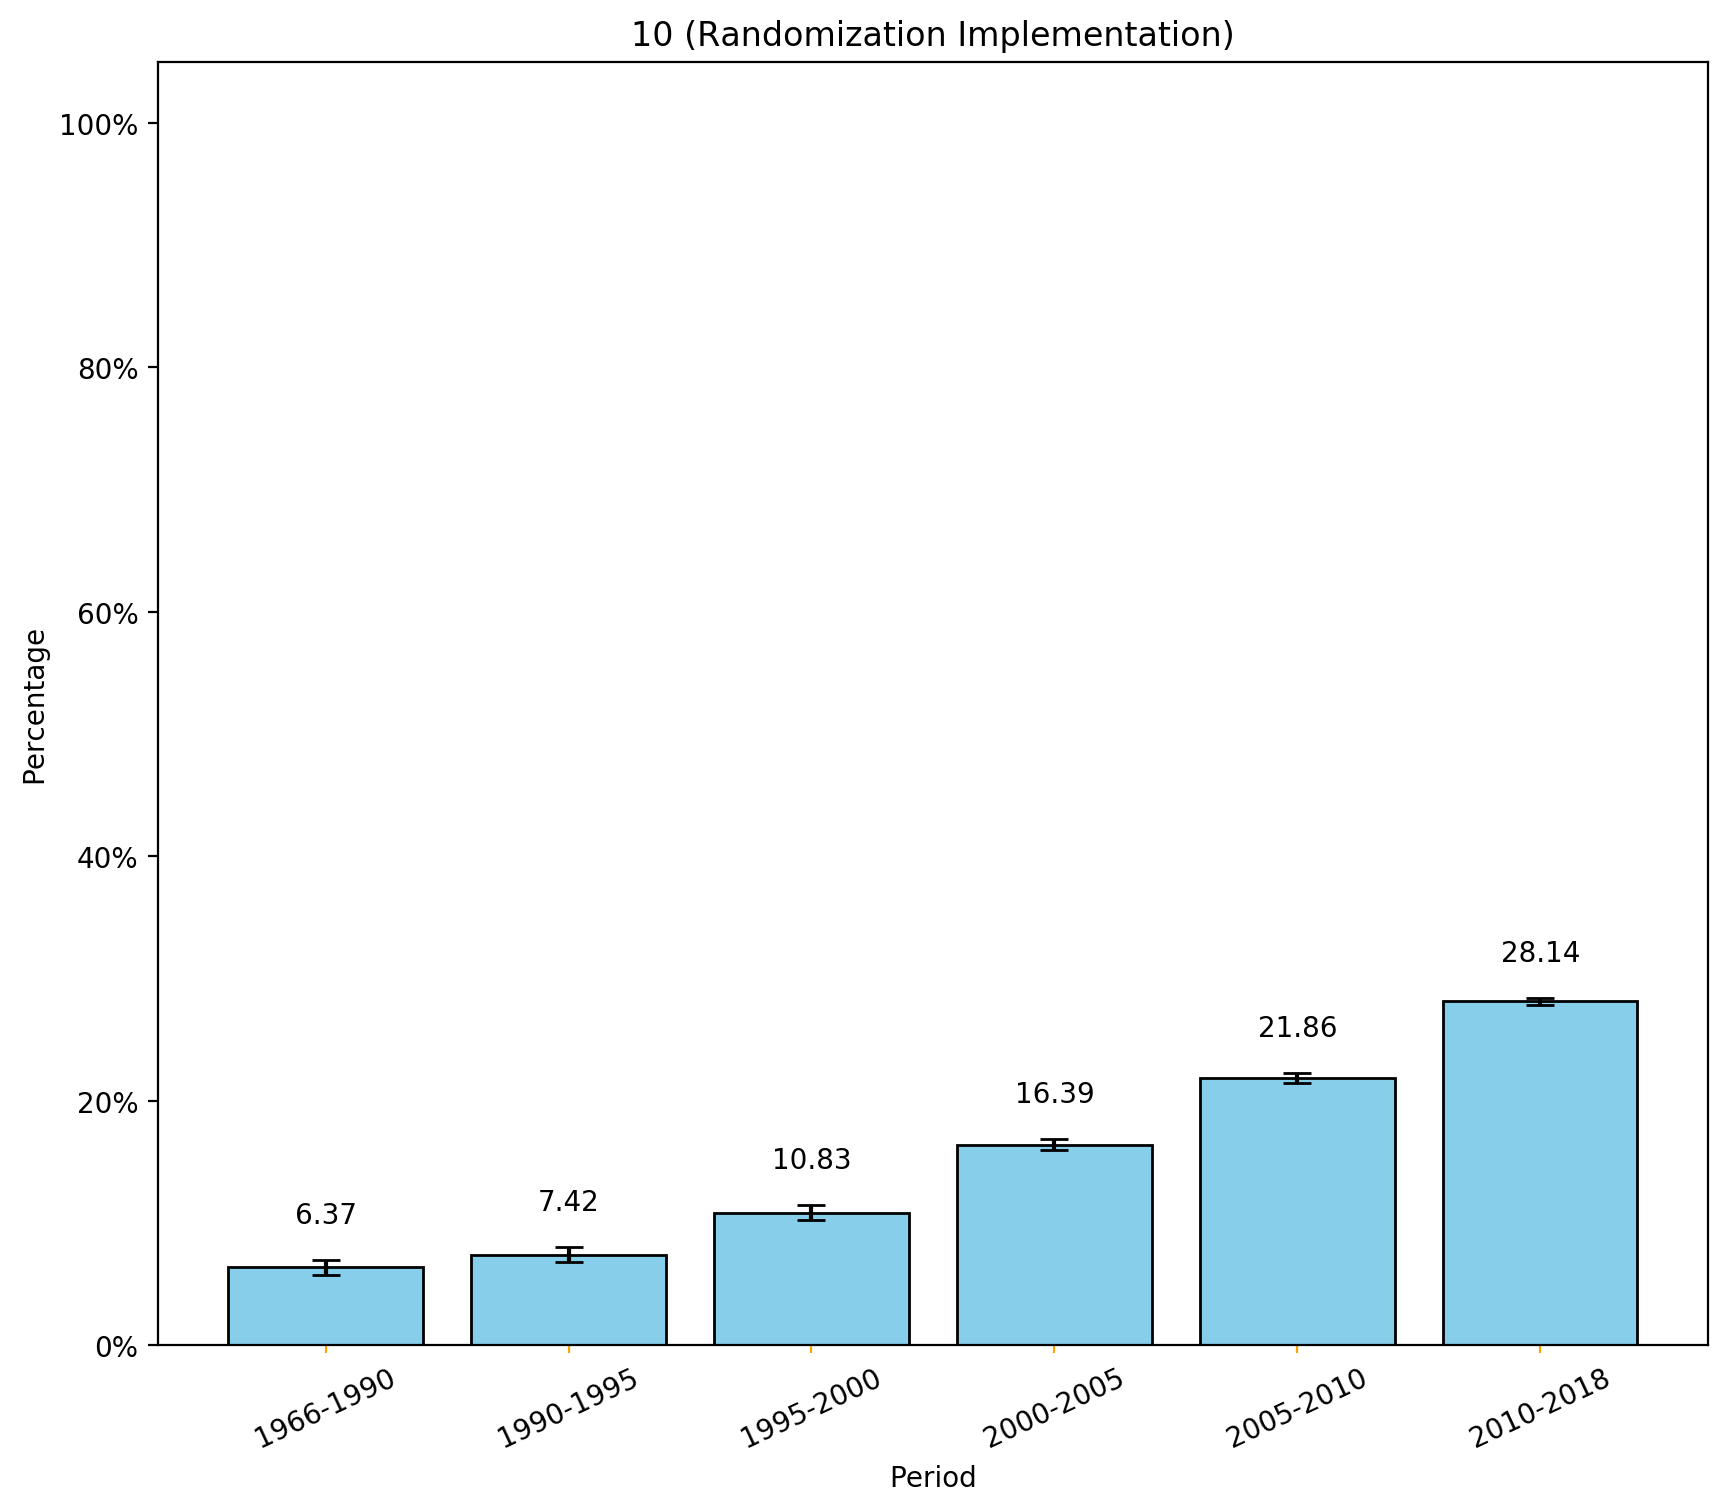

<BarContainer object of 6 artists>

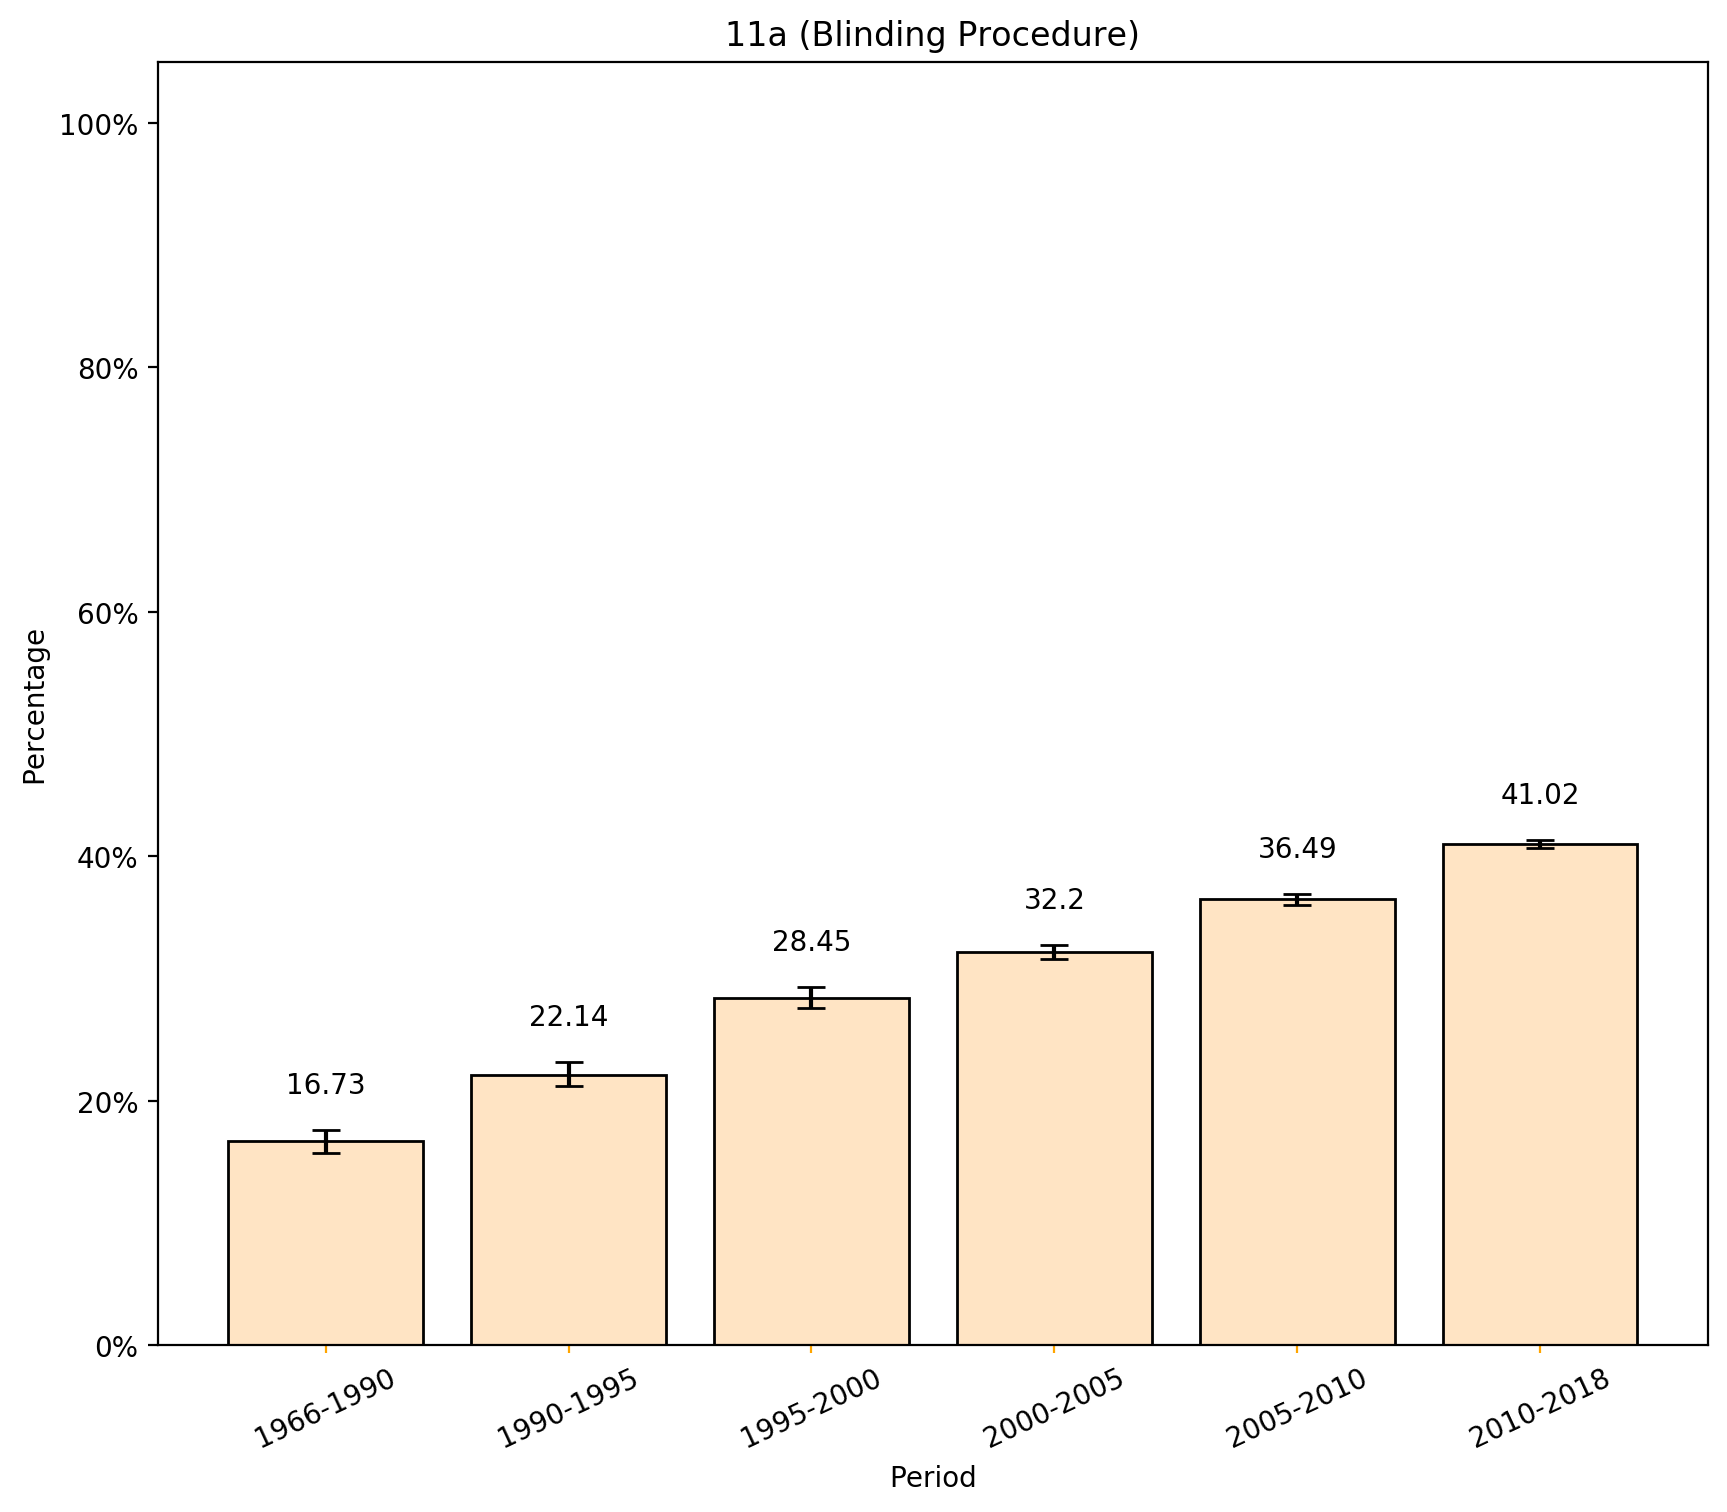

<BarContainer object of 6 artists>

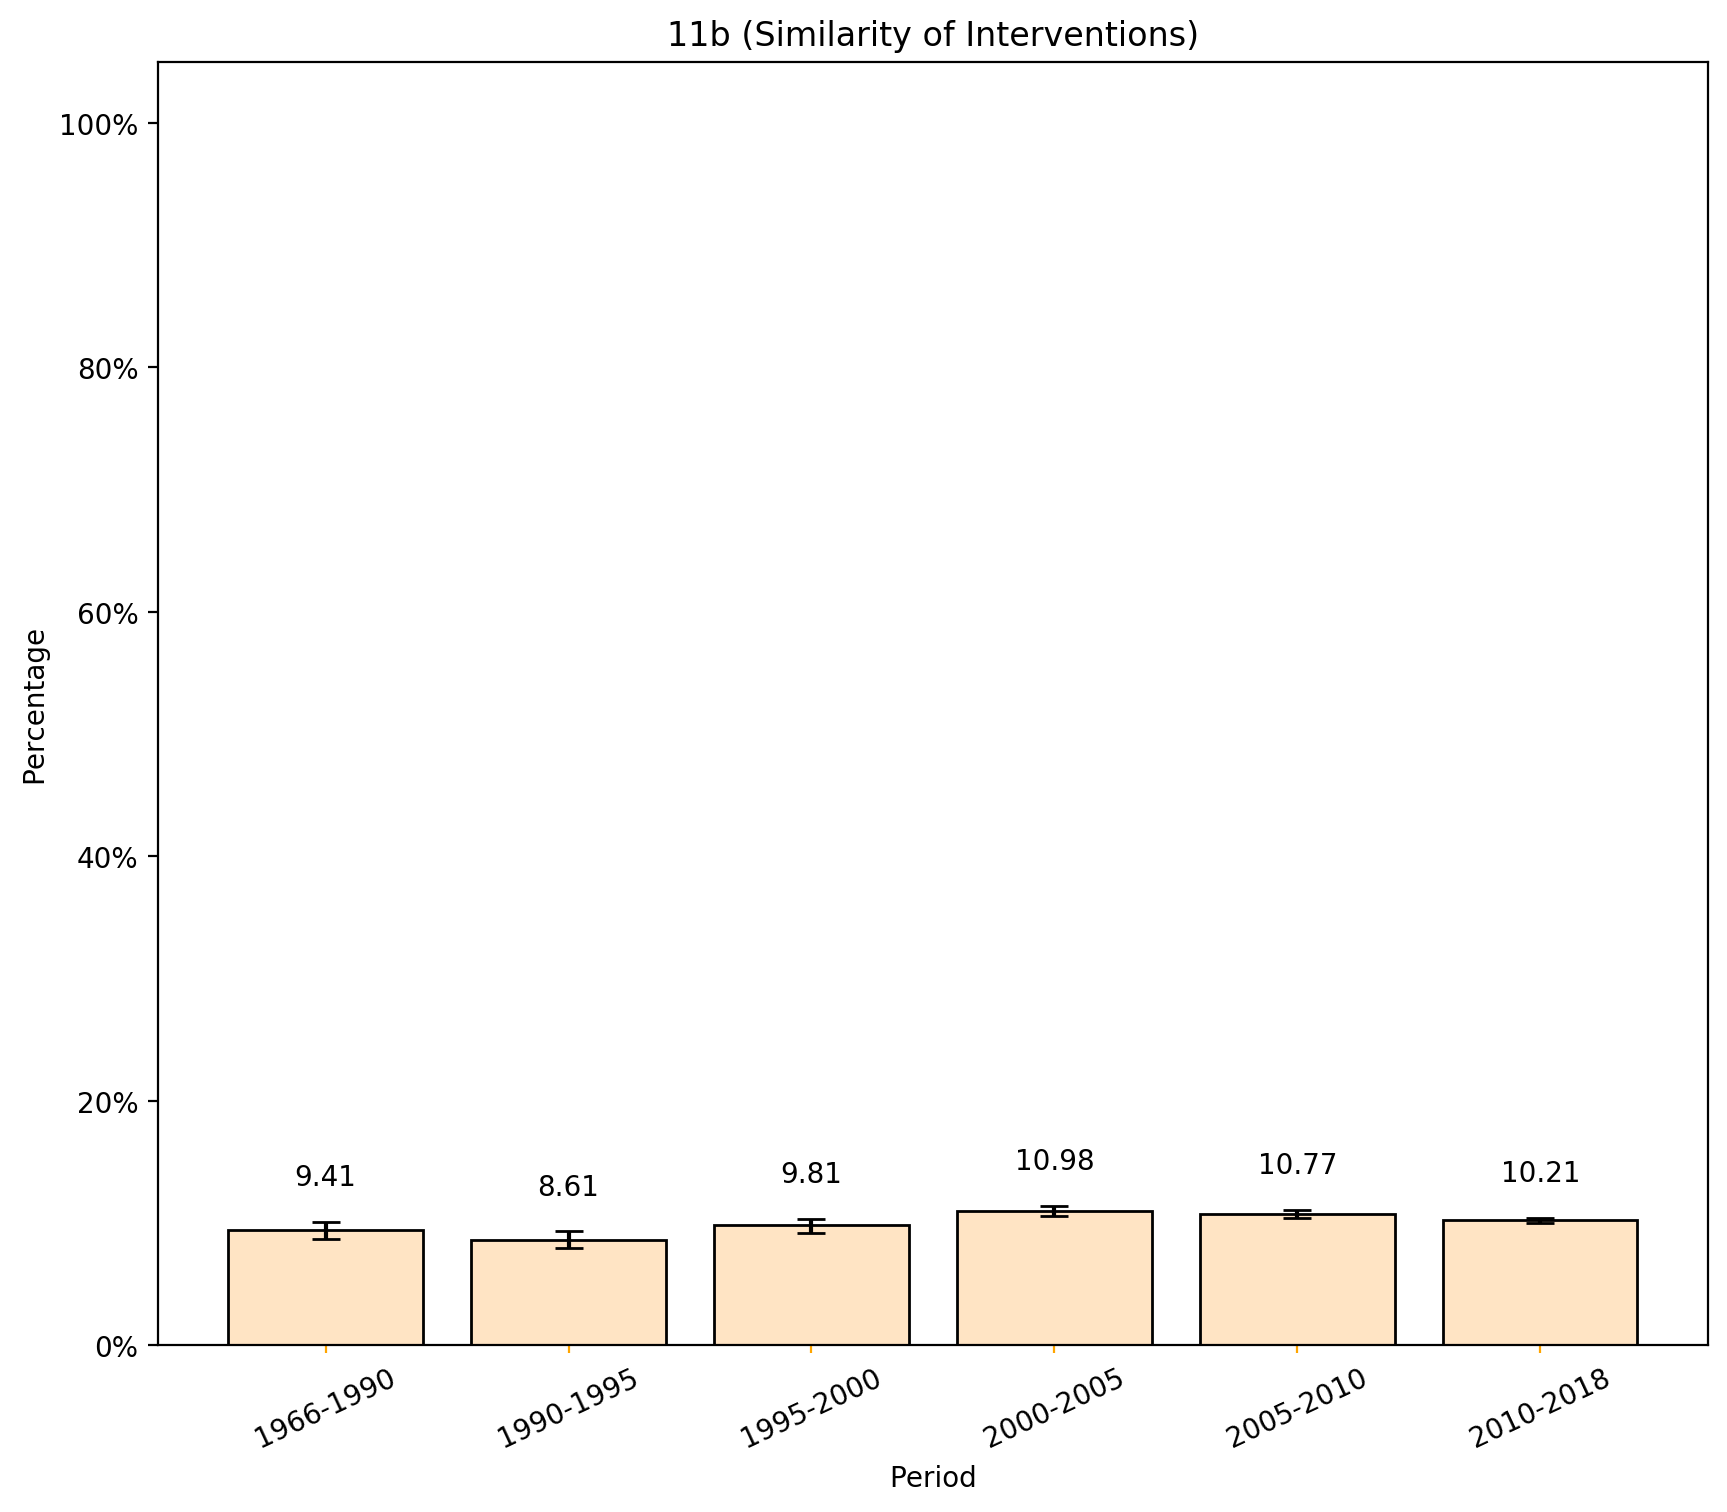

<BarContainer object of 6 artists>

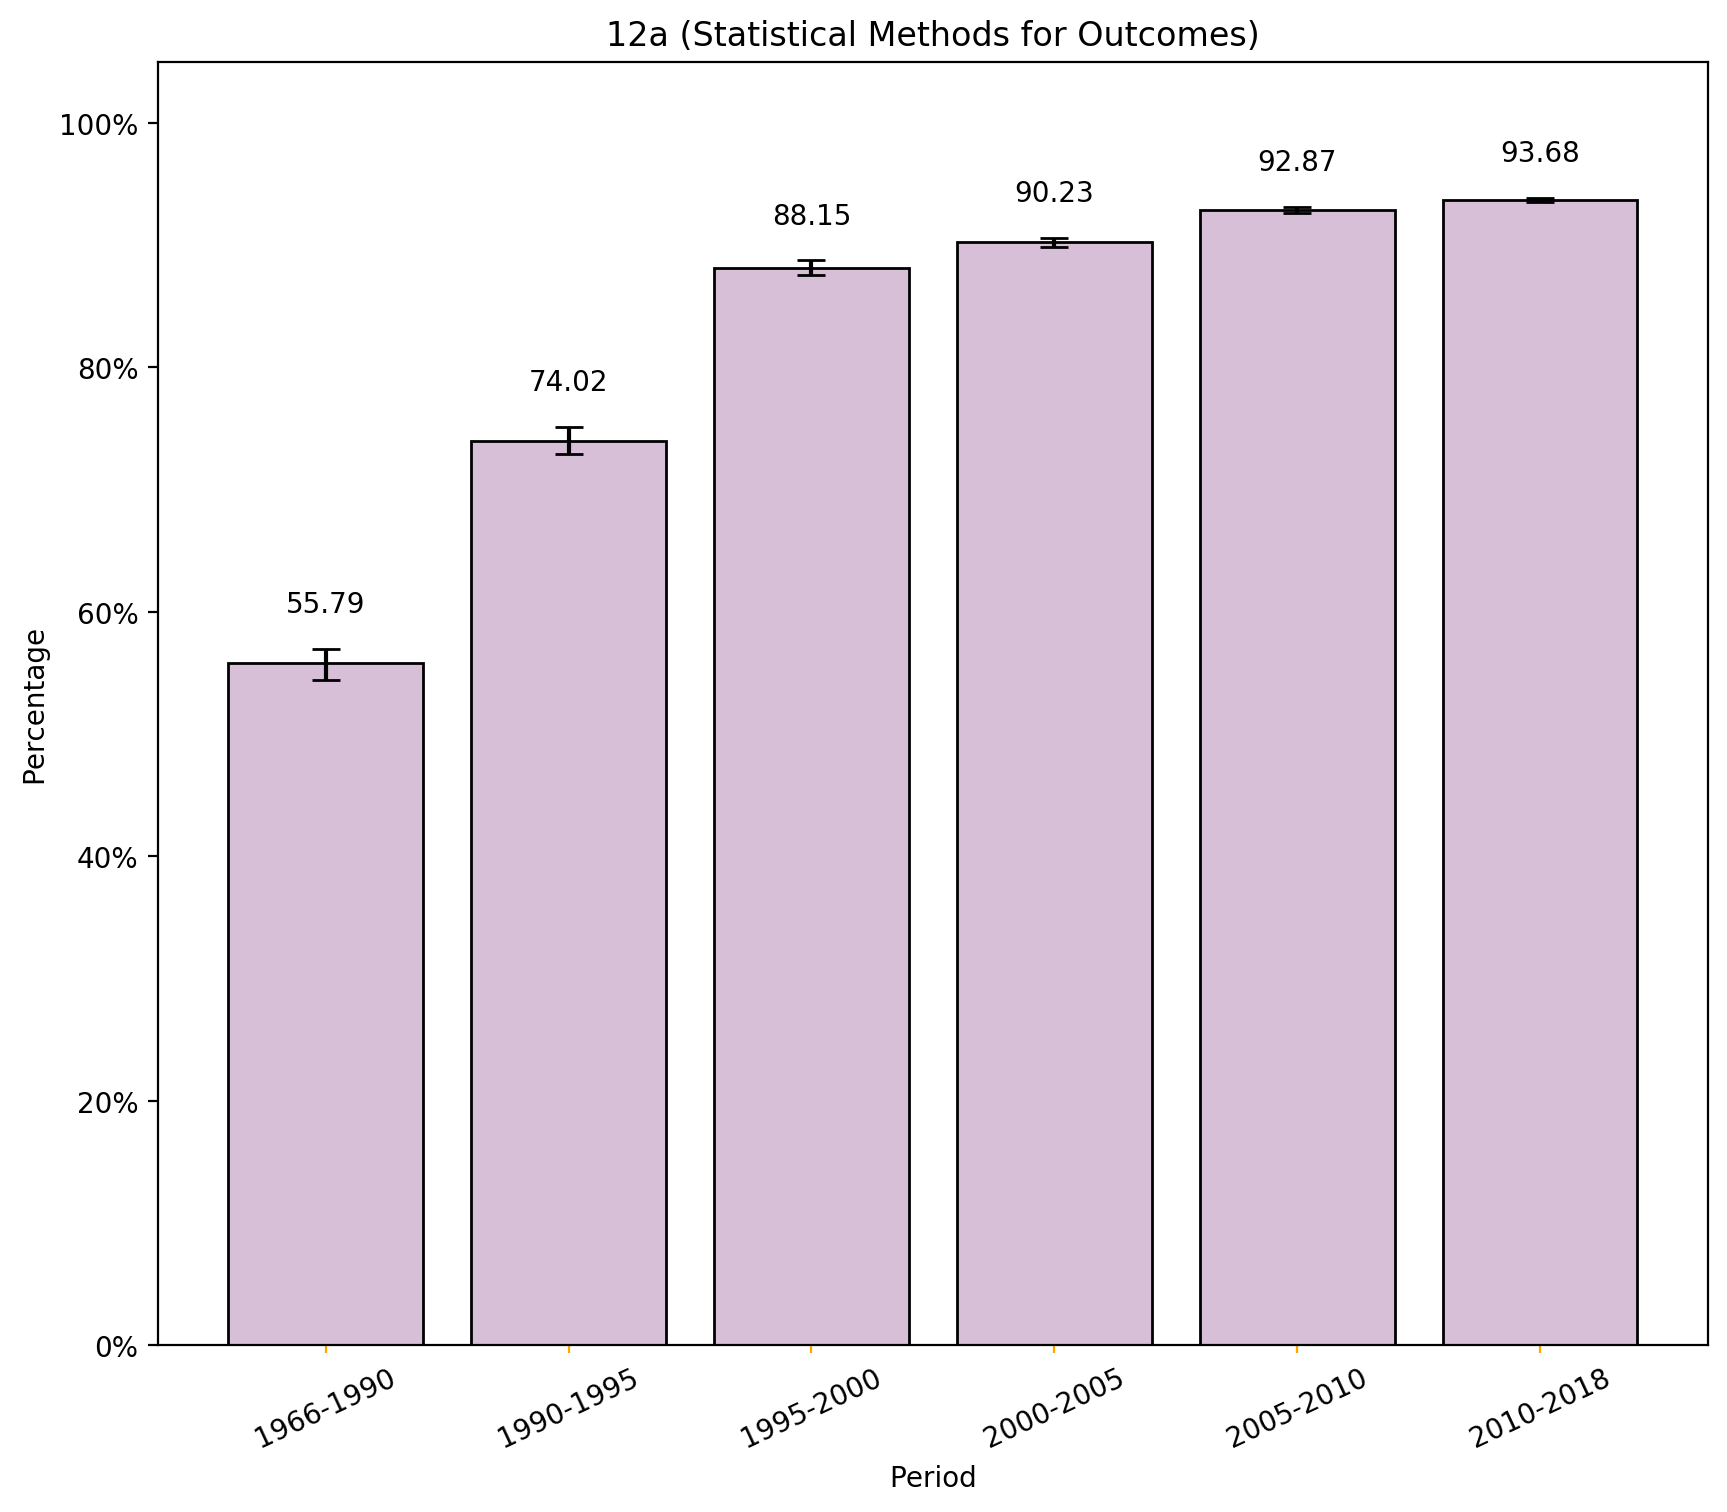

<BarContainer object of 6 artists>

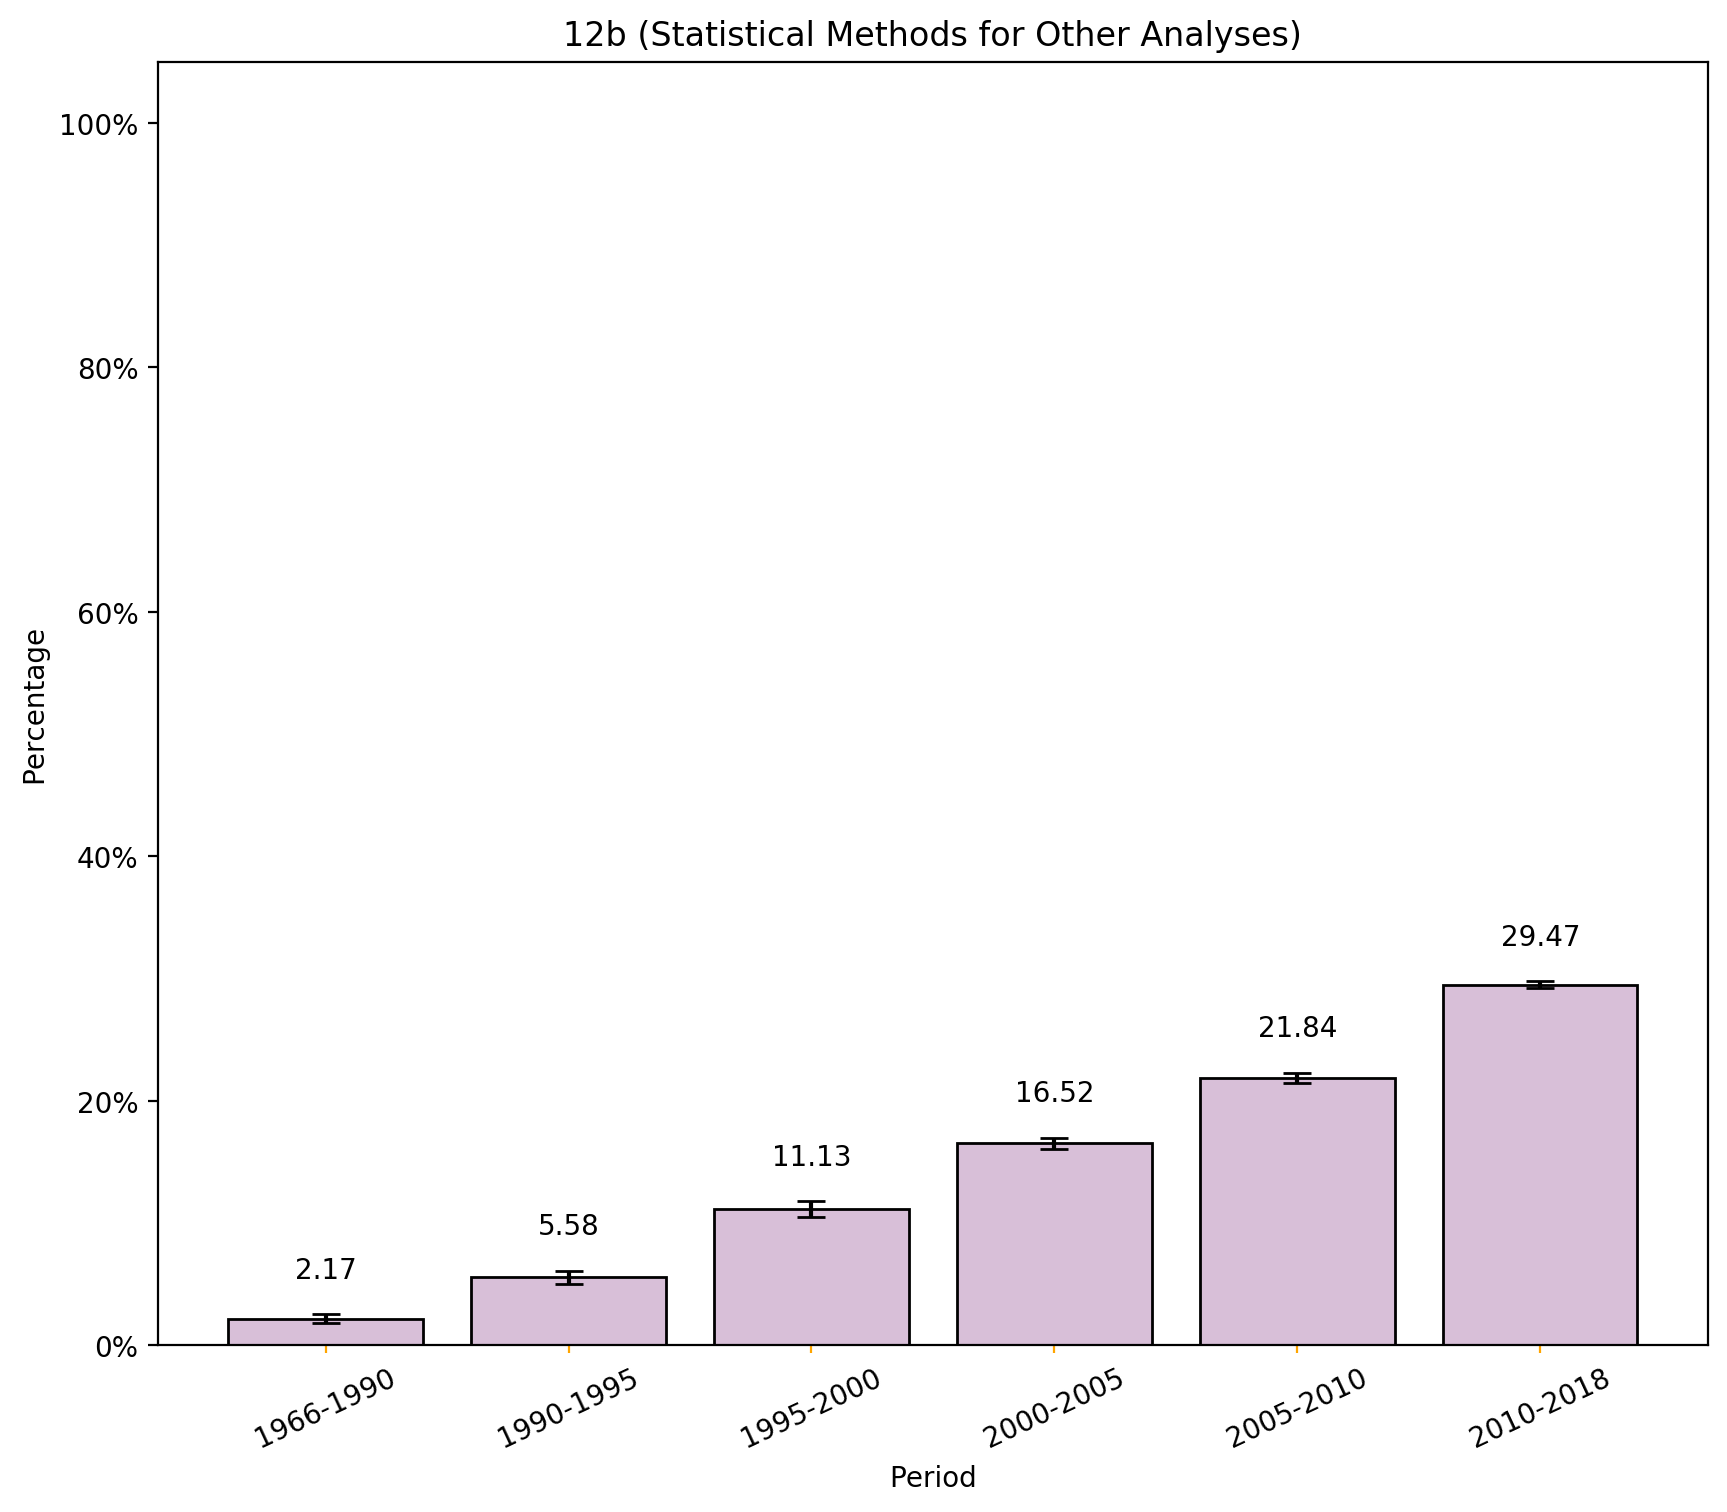

In [21]:
for i in range(0, 90, 6):
    plot(CONSORT_items.iloc[i:i+6,1:], [4, 5], 'Figures/', CONSORT_items.iloc[i,0])

In [22]:
value = pd.read_csv('/u/lanj3/data/analysis/UTRECHT_analysis.csv',index_col=0) 

In [23]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+3,round(y[i], 2), ha = 'center')

def plot(row, output_path):
    plt.figure(figsize=(10, 8.5), dpi=80)
    keys = list(row.index)
    values = [i*100 for i in list(row)]
    
    
    display(plt.bar(keys, values))
    
    axes = plt.gca()
#     axes.set_xlim([x_min,x_max])
    axes.set_ylim([0,105])
    axes.set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]) 
    addlabels(keys, values)
    # plt.title('Percentage number of CONSORT items reported in papers per journal '+file.columns[0])
    plt.title(row.name)
    plt.xticks(keys, keys)
    # plt.xlabel(row.name)
    plt.ylabel("Percentage")
    plt.tick_params(axis='x', color='orange', labelrotation=25)
    
    plt.savefig(output_path + row.name + "_ratio.png")
    
    plt.show()

<BarContainer object of 6 artists>

/tmp/ipykernel_4105269/2989466677.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


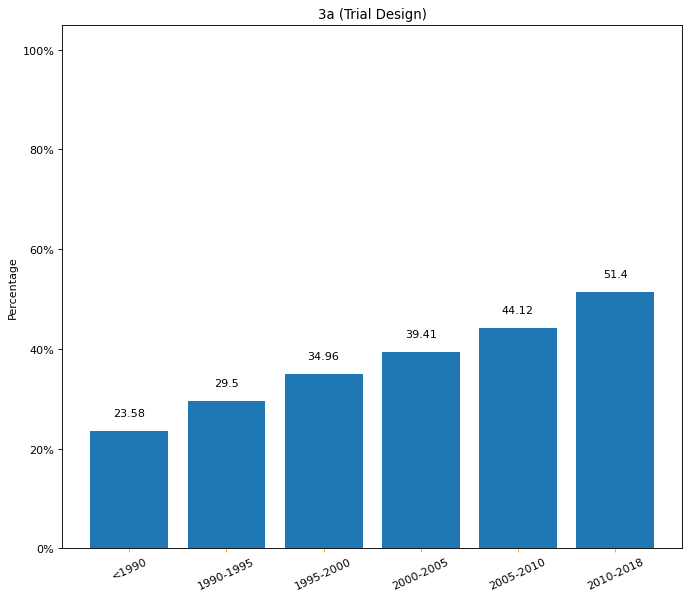

<BarContainer object of 6 artists>

/tmp/ipykernel_4105269/2989466677.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


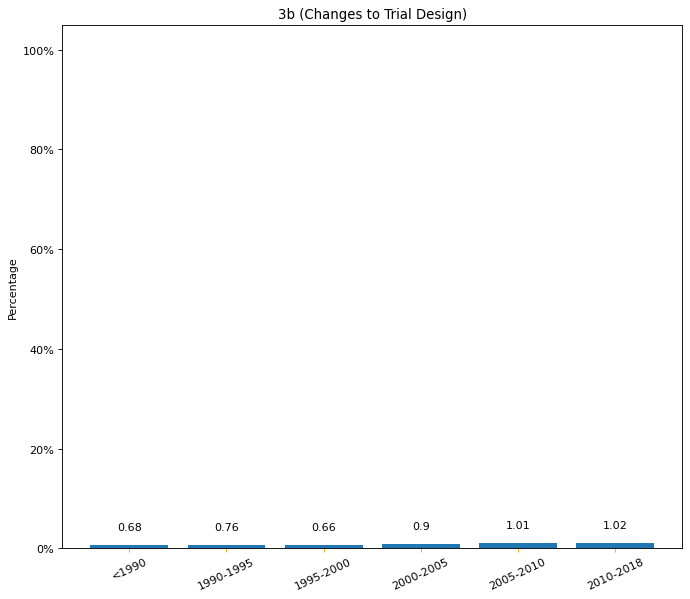

<BarContainer object of 6 artists>

/tmp/ipykernel_4105269/2989466677.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


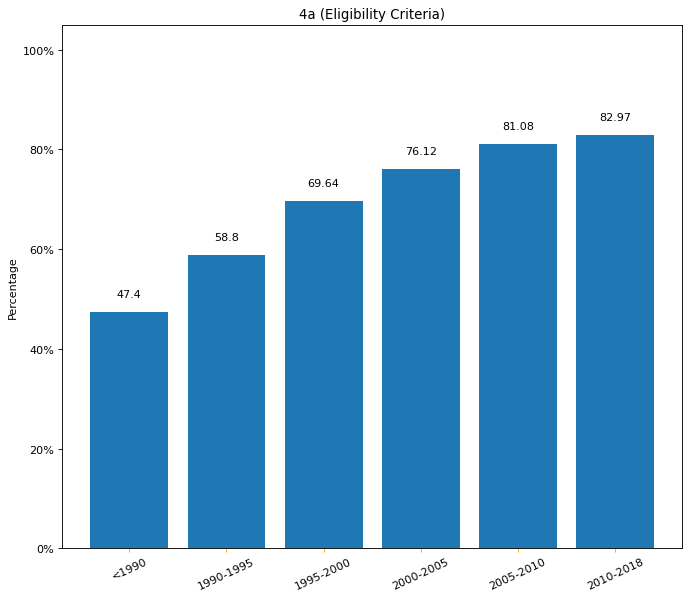

<BarContainer object of 6 artists>

/tmp/ipykernel_4105269/2989466677.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


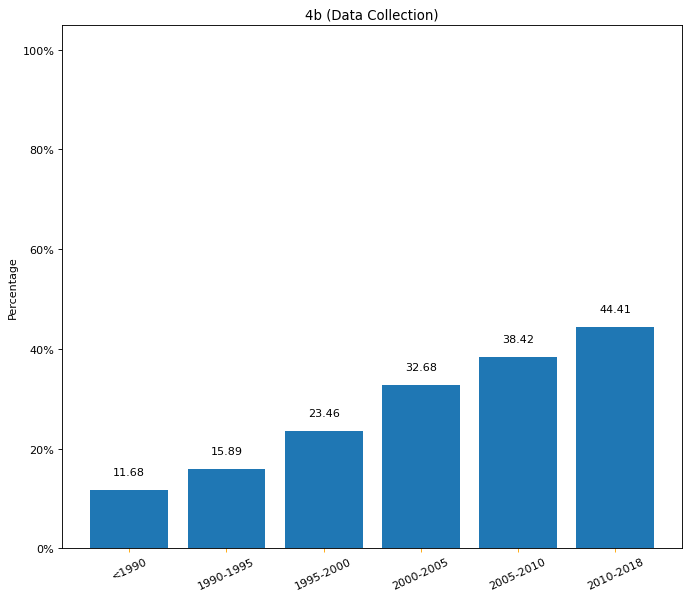

<BarContainer object of 6 artists>

/tmp/ipykernel_4105269/2989466677.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


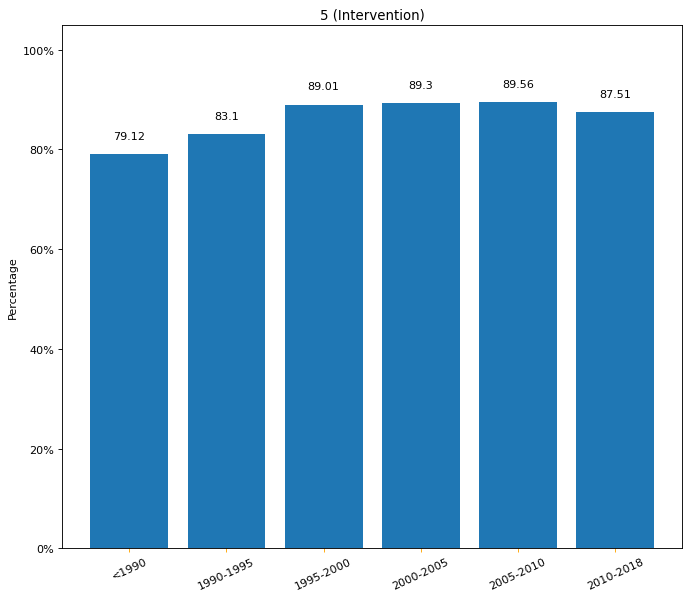

<BarContainer object of 6 artists>

/tmp/ipykernel_4105269/2989466677.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


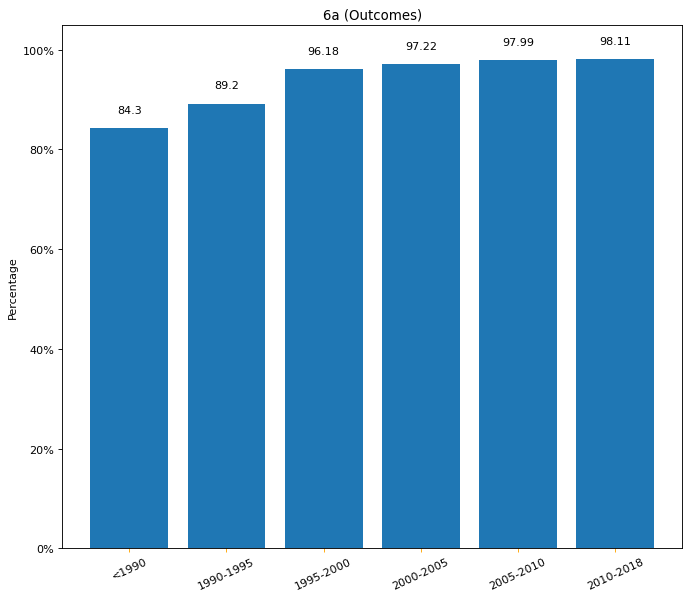

<BarContainer object of 6 artists>

/tmp/ipykernel_4105269/2989466677.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


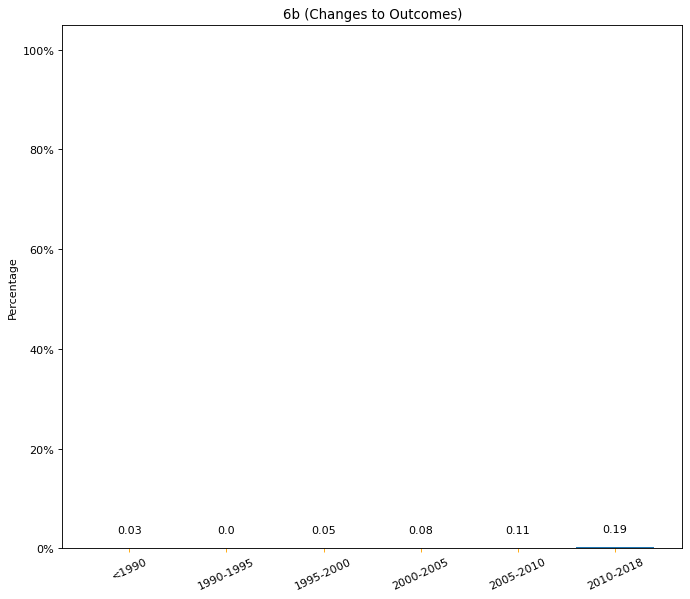

<BarContainer object of 6 artists>

/tmp/ipykernel_4105269/2989466677.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


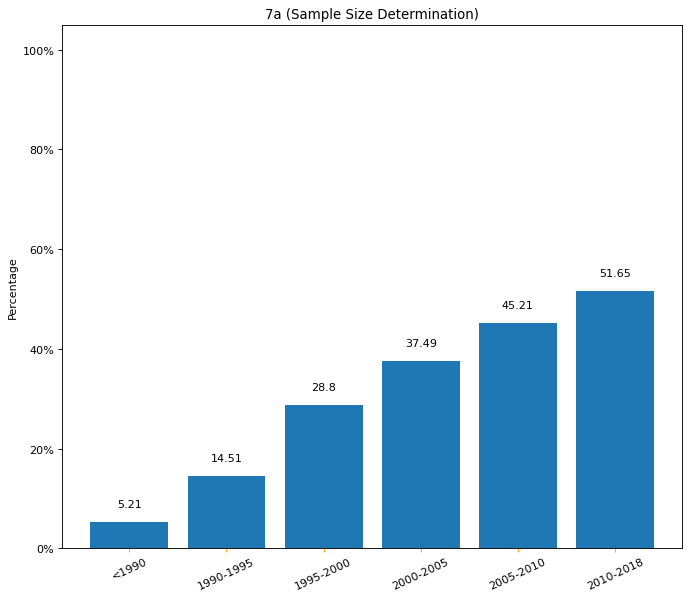

<BarContainer object of 6 artists>

/tmp/ipykernel_4105269/2989466677.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


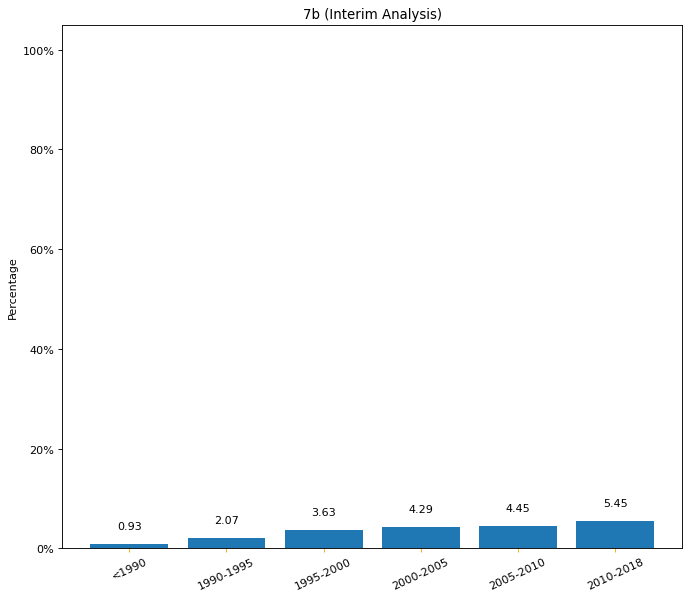

<BarContainer object of 6 artists>

/tmp/ipykernel_4105269/2989466677.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


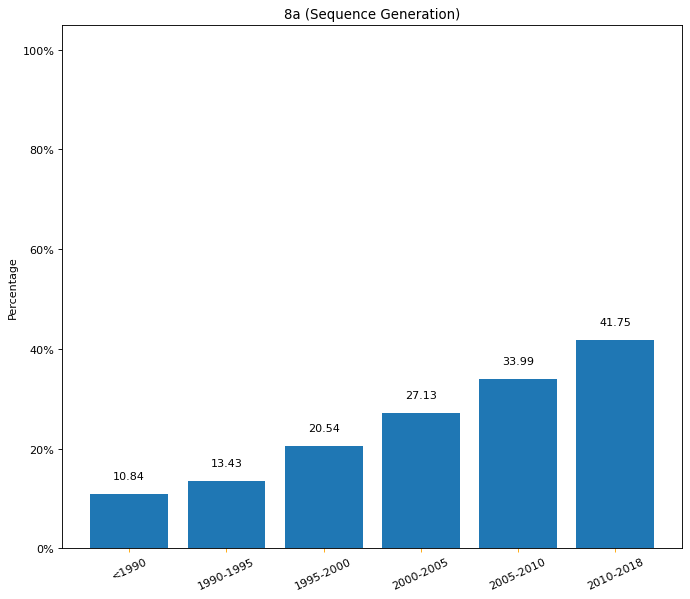

<BarContainer object of 6 artists>

/tmp/ipykernel_4105269/2989466677.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


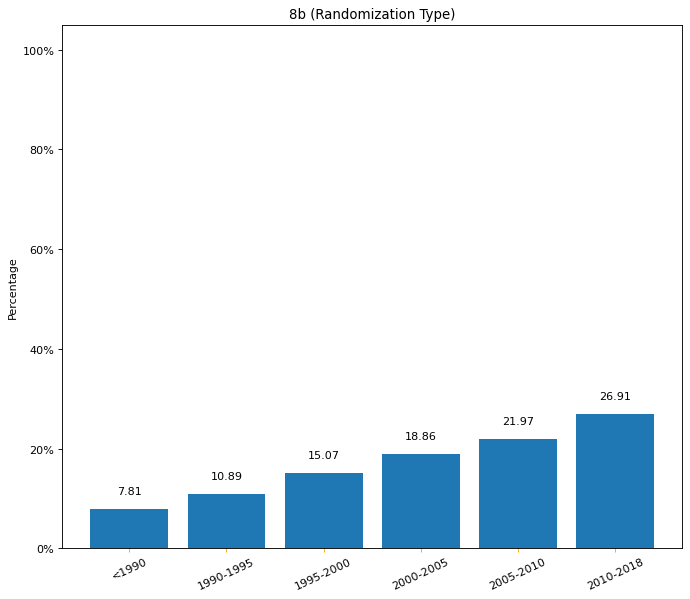

<BarContainer object of 6 artists>

/tmp/ipykernel_4105269/2989466677.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


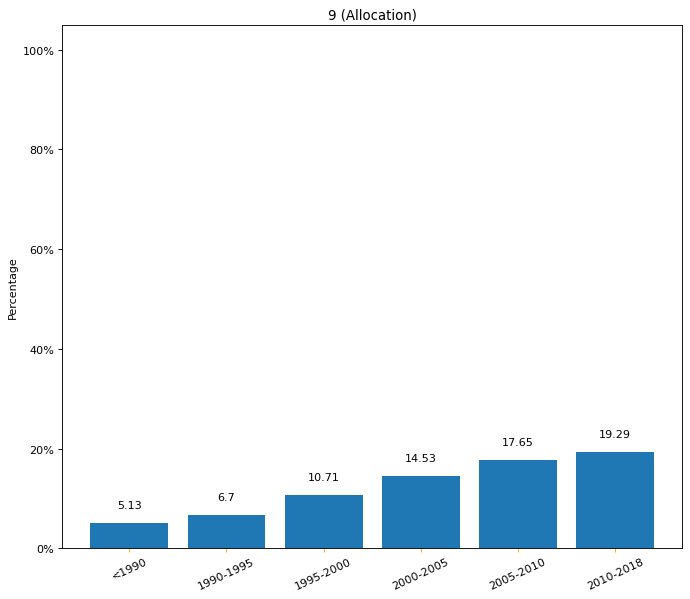

<BarContainer object of 6 artists>

/tmp/ipykernel_4105269/2989466677.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


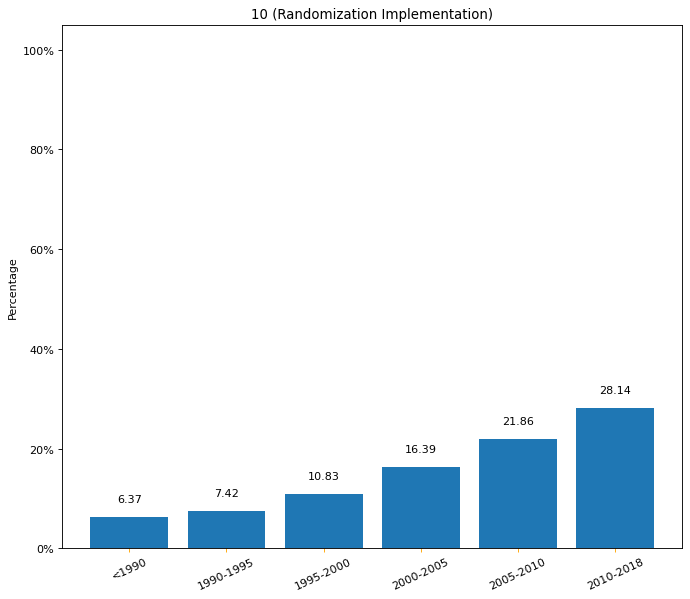

<BarContainer object of 6 artists>

/tmp/ipykernel_4105269/2989466677.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


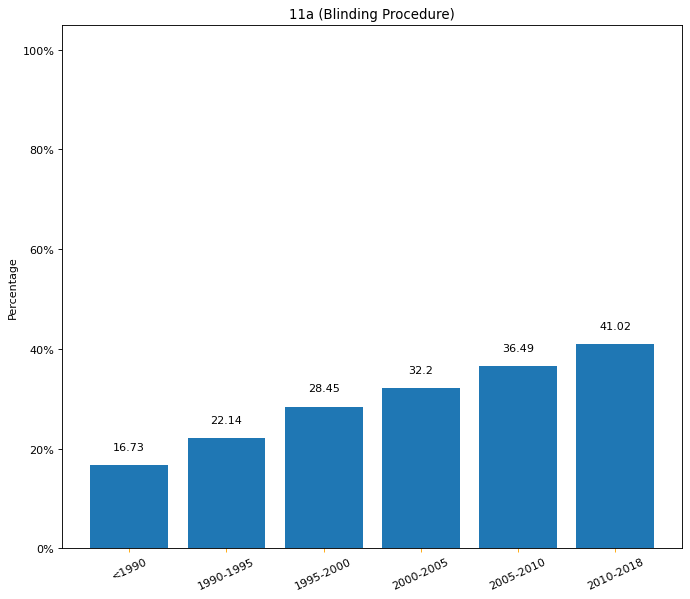

<BarContainer object of 6 artists>

/tmp/ipykernel_4105269/2989466677.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


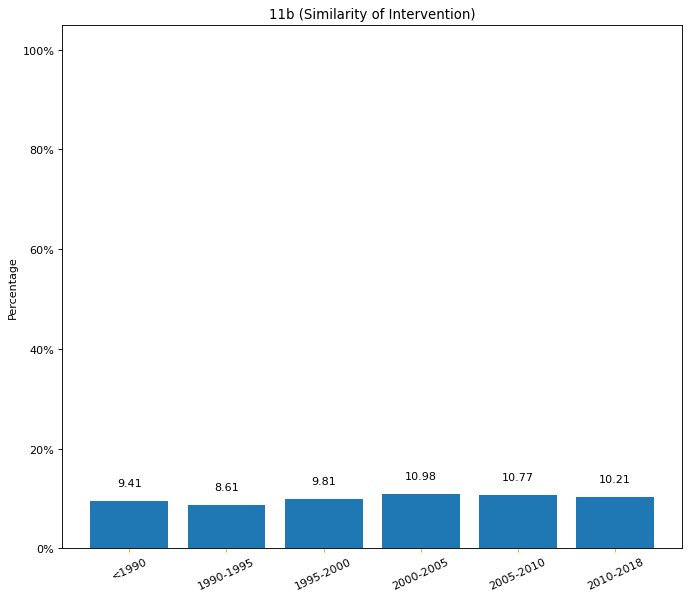

<BarContainer object of 6 artists>

/tmp/ipykernel_4105269/2989466677.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


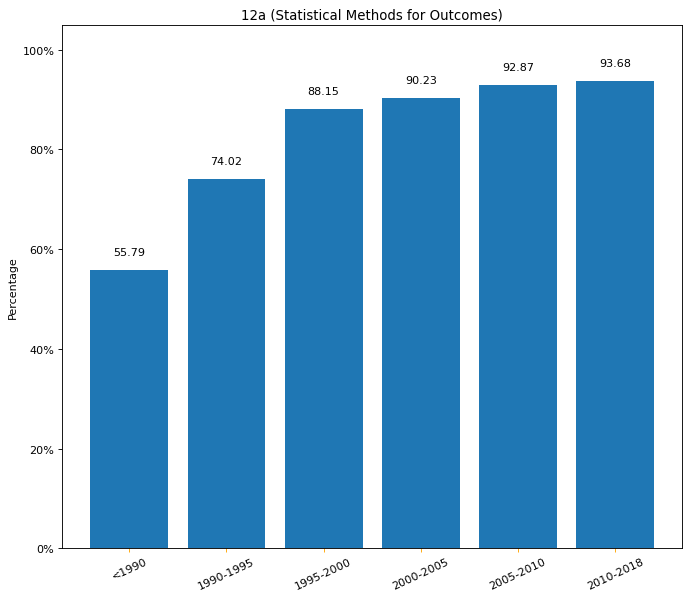

<BarContainer object of 6 artists>

/tmp/ipykernel_4105269/2989466677.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


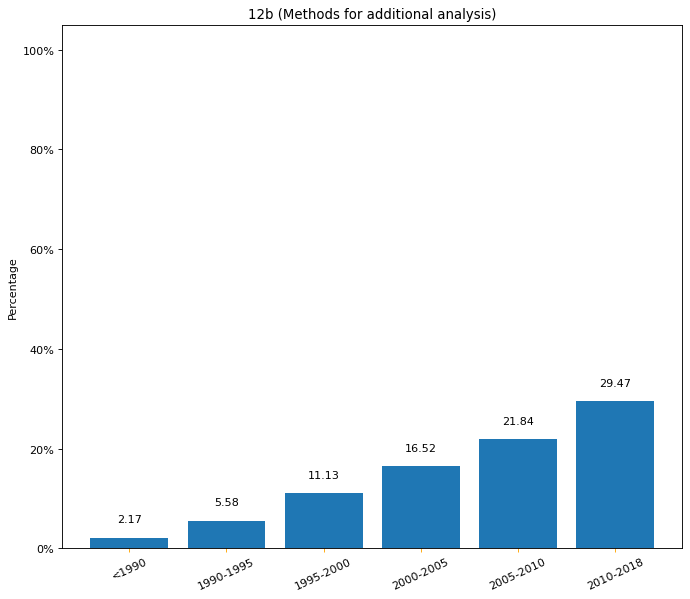

In [24]:
for i in range(value.shape[0]):
    plot(value.iloc[i,:], '/u/lanj3/data/Figures/per_period/')